In [107]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

In [4]:
with open('EmbeddingText_edited.pkl', 'rb') as f:
    text_embedding = pickle.load(f)
y_actual=list(pd.read_csv('encoded_books_data.csv')['Book_Name'])

In [5]:
text_embedding.keys()

dict_keys(['BOW', 'TF_IDF 1_gram', 'Doc2vec', 'LDA'])

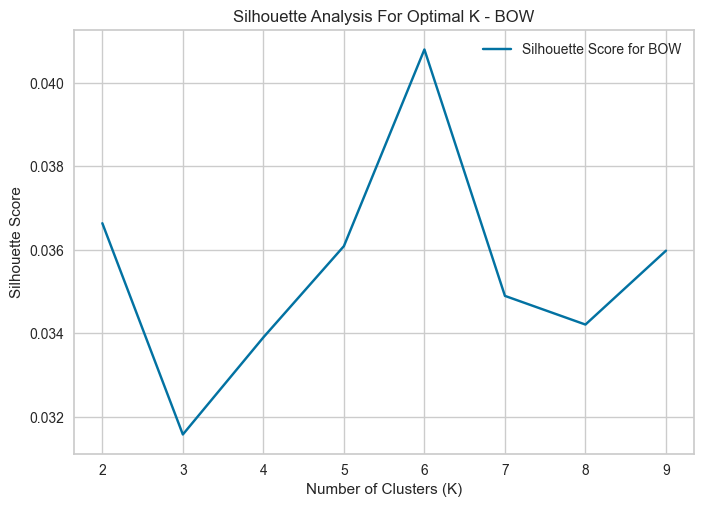

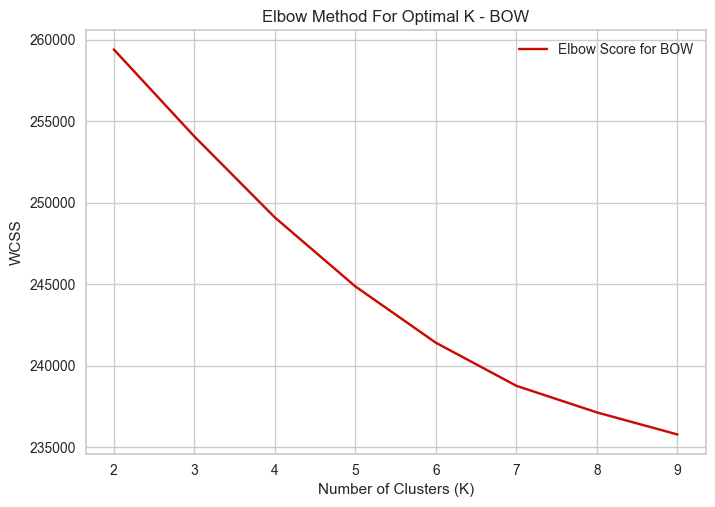

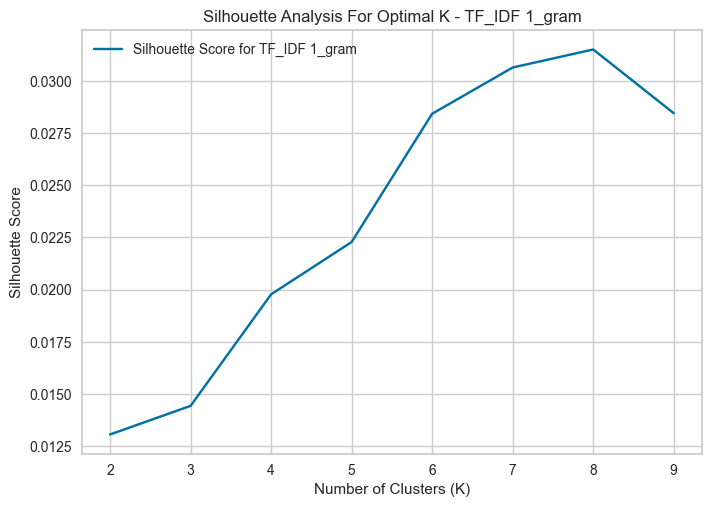

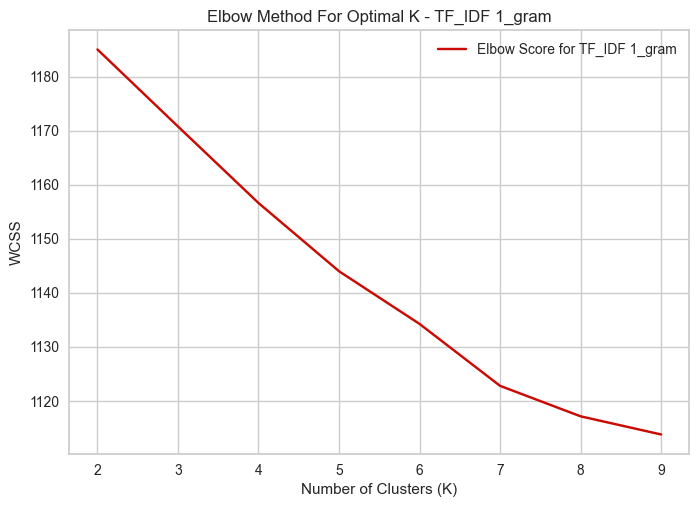

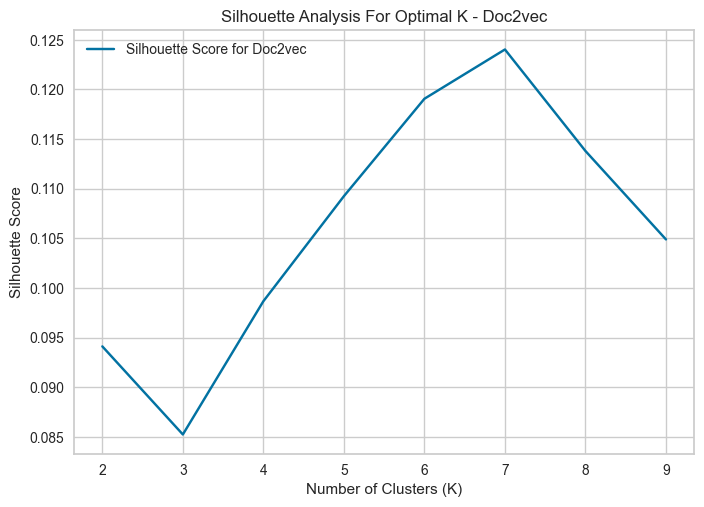

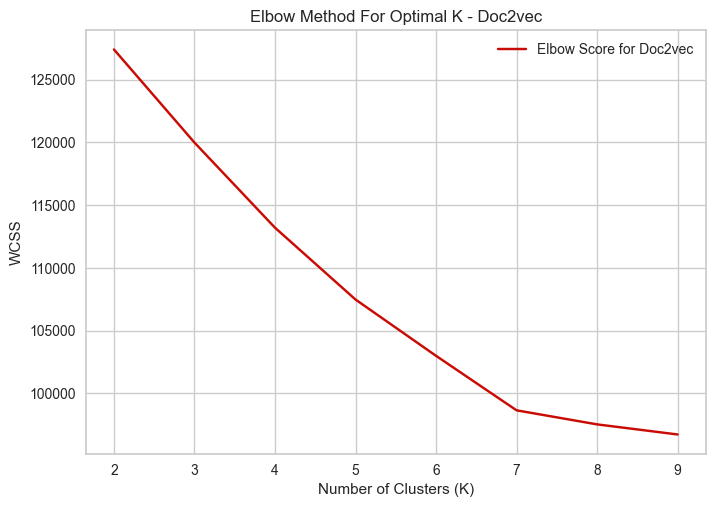

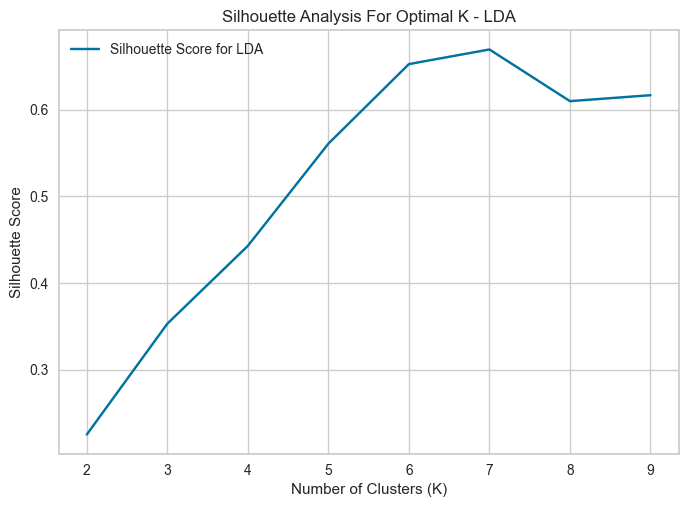

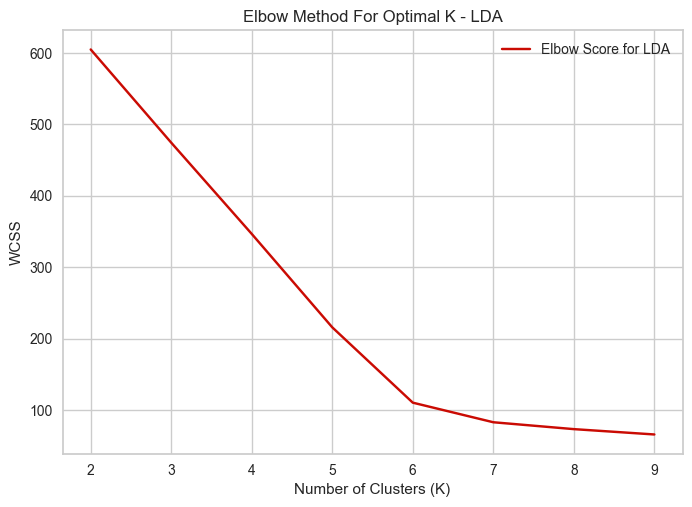

In [95]:
from sklearn.metrics import mean_squared_error, silhouette_score
kmeans_elb_vec = {}
kmeans_sil_vec = {}
optimal_clusters = {}
clusters = 10

for k in text_embedding.keys():
   x_kmeans = text_embedding[k]
   silhouette_scores = []
   elbow_scores = []
   silhouette_score_val = np.zeros((clusters-2))
   optimal_silhouette_score = -1  # Initialize the optimal silhouette score
   optimal_k_value = -1  # Initialize the corresponding K value
   
   # Calculate silhouette score and elbow score for different number of clusters
   for i in range(2, clusters):
    kmeans_classifier = KMeans(n_clusters = i
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=500
                               , random_state = 42
                               , algorithm = 'elkan')
    label_kmeans = kmeans_classifier.fit_predict(x_kmeans)
    silhouette_score_val= silhouette_score(x_kmeans, label_kmeans)
    if silhouette_score_val > optimal_silhouette_score:
      optimal_silhouette_score = silhouette_score_val
      optimal_k_value = i
    
    silhouette_scores.append(silhouette_score_val)
    elbow_scores.append(kmeans_classifier.inertia_)

   optimal_clusters[k] = (optimal_silhouette_score, optimal_k_value)
   
   # Store silhouette and elbow scores in the respective dictionaries
   kmeans_elb_vec[k] = elbow_scores
   kmeans_sil_vec[k] = silhouette_scores

   # Plotting silhouette score against the number of clusters
   plt.plot(range(2, clusters), silhouette_scores, 'bx-', label='Silhouette Score for {}'.format(k))
   plt.xlabel('Number of Clusters (K)')
   plt.ylabel('Silhouette Score')
   plt.title('Silhouette Analysis For Optimal K - {}'.format(k))
   plt.legend()
   plt.grid(True)
   plt.show()

   # Plotting elbow score against the number of clusters
   plt.plot(range(2, clusters), elbow_scores, 'rx-', label='Elbow Score for {}'.format(k))
   plt.xlabel('Number of Clusters (K)')
   plt.ylabel('WCSS')
   plt.title('Elbow Method For Optimal K - {}'.format(k))
   plt.legend()
   plt.grid(True)
   plt.show()


BOW


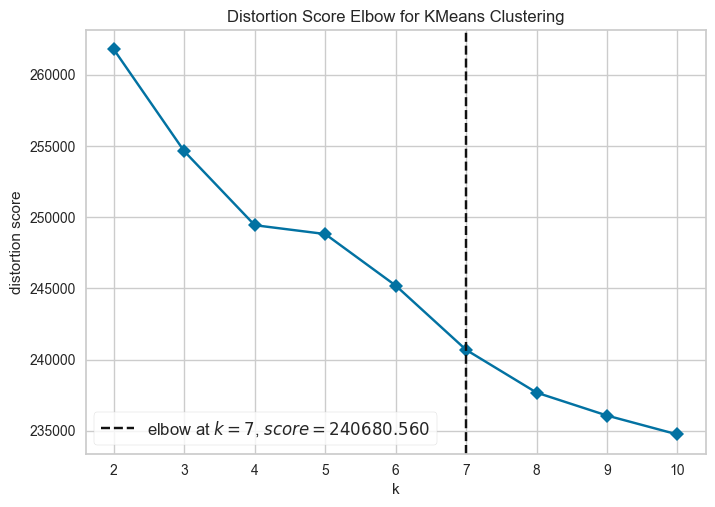

TF_IDF 1_gram


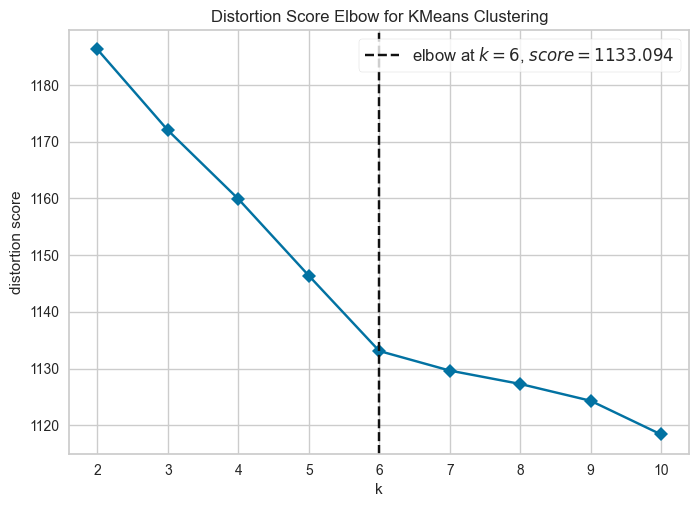

Doc2vec


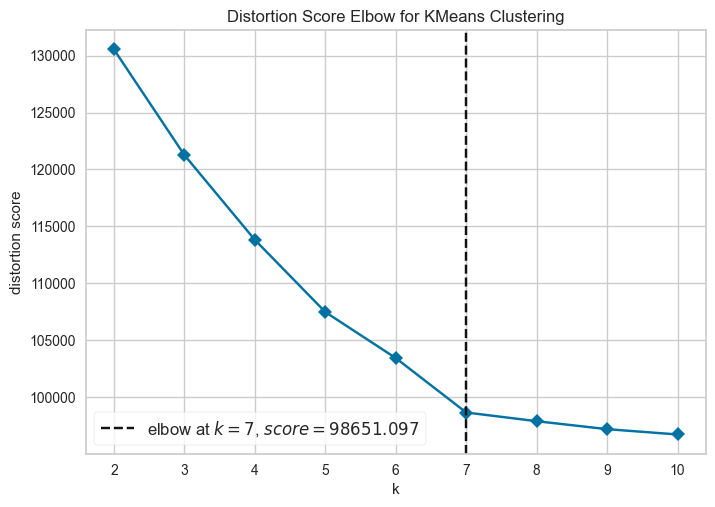

LDA


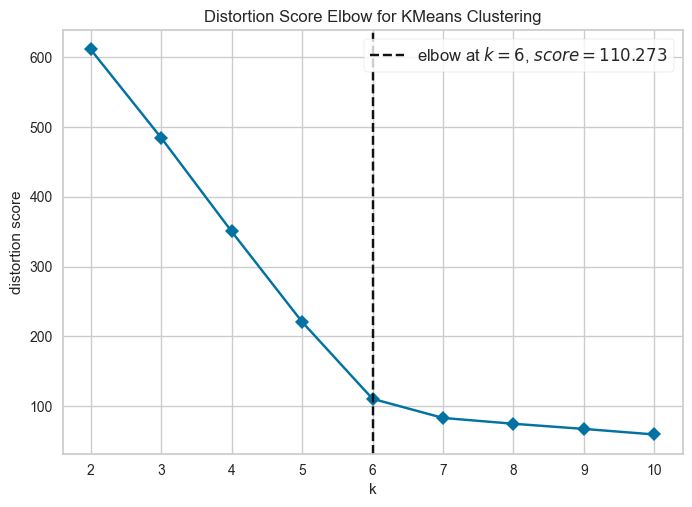

In [104]:
from yellowbrick.cluster.elbow import kelbow_visualizer


for k in text_embedding.keys():
  print(k)
  x_kmeans = text_embedding[k]
  model = kelbow_visualizer(KMeans(random_state=0), x_kmeans, k=(2,11),metric='distortion',timings=False)
    

In [99]:
for k in text_embedding.keys():
   print(k)
   value = optimal_clusters[k][0]
   k_value = optimal_clusters[k][1]
   print( "The best silhouette score was", value, "with k =", k_value)
   

BOW
The best silhouette score was 0.040802929387957 with k = 6
TF_IDF 1_gram
The best silhouette score was 0.03150811826646423 with k = 8
Doc2vec
The best silhouette score was 0.124027744 with k = 7
LDA
The best silhouette score was 0.6695310465886285 with k = 7


PCA =  1
Method =  BOW
The best silhouette score was 0.6622966457893911 with k = 2
Elbow Score:  {'BOW': [3055.4304300481826, 1443.6652011619688, 918.3797171688766, 589.1812297978224, 426.7424419368805, 317.05853657259894, 234.8712059022527, 184.71377575843016], 'TF_IDF 1_gram': [1185.0280322173612, 1170.7756231900996, 1156.6101111438647, 1143.9854578268123, 1134.2380624254665, 1122.7751721972083, 1117.1360718888259, 1113.77487832401], 'Doc2vec': [127395.609375, 119978.3046875, 113196.109375, 107475.03125, 102991.28125, 98650.0625, 97529.7265625, 96725.9375], 'LDA': [604.8411785667137, 474.3507021596892, 346.5630764351246, 215.75235023515336, 110.27206347629519, 82.83697813541673, 73.21012405620472, 65.72791023246675]}
Silhoutee Score:  {'BOW': [0.6622966457893911, 0.6229911534142691, 0.5768139977149064, 0.5507091009288267, 0.5417685297707675, 0.5359683062748606, 0.5365225001268135, 0.5389798481980519], 'TF_IDF 1_gram': [0.01306060963154134, 0.014431821971075334, 0.01977531905329505, 0

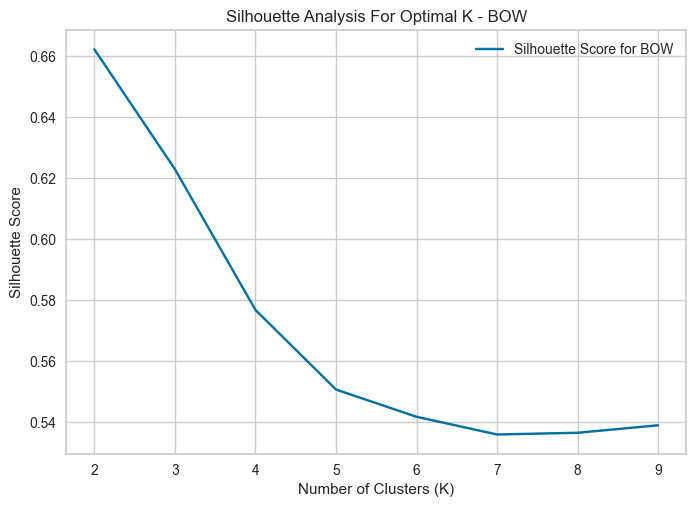

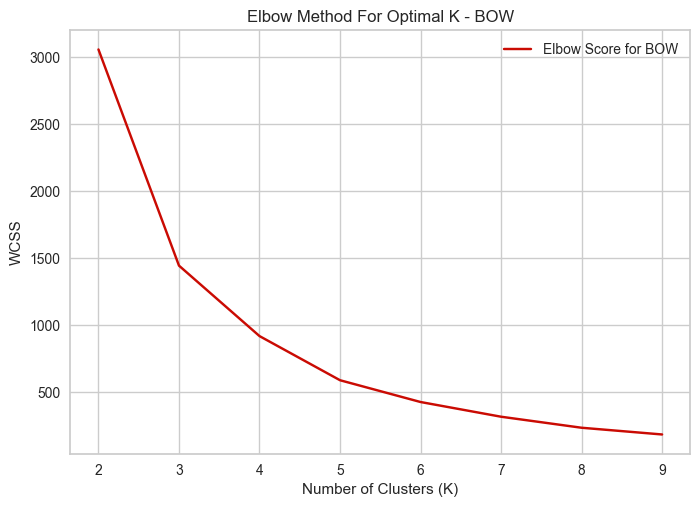

Method =  TF_IDF 1_gram
The best silhouette score was 0.6592005718953194 with k = 2
Elbow Score:  {'BOW': [3055.4304300481826, 1443.6652011619688, 918.3797171688766, 589.1812297978224, 426.7424419368805, 317.05853657259894, 234.8712059022527, 184.71377575843016], 'TF_IDF 1_gram': [6.360786979650215, 2.95206487515998, 1.694081729867948, 1.073095871815459, 0.8115541411209076, 0.6238669635539154, 0.4761012023346884, 0.3675314355010651], 'Doc2vec': [127395.609375, 119978.3046875, 113196.109375, 107475.03125, 102991.28125, 98650.0625, 97529.7265625, 96725.9375], 'LDA': [604.8411785667137, 474.3507021596892, 346.5630764351246, 215.75235023515336, 110.27206347629519, 82.83697813541673, 73.21012405620472, 65.72791023246675]}
Silhoutee Score:  {'BOW': [0.6622966457893911, 0.6229911534142691, 0.5768139977149064, 0.5507091009288267, 0.5417685297707675, 0.5359683062748606, 0.5365225001268135, 0.5389798481980519], 'TF_IDF 1_gram': [0.6592005718953194, 0.5613498551110874, 0.5585173444350638, 0.57288

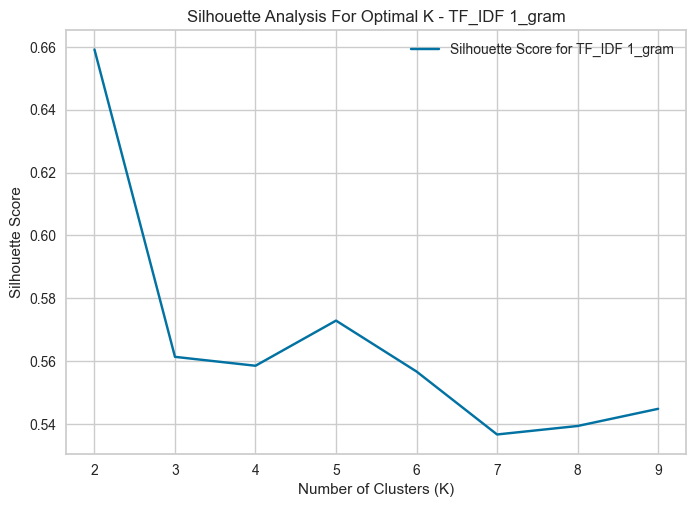

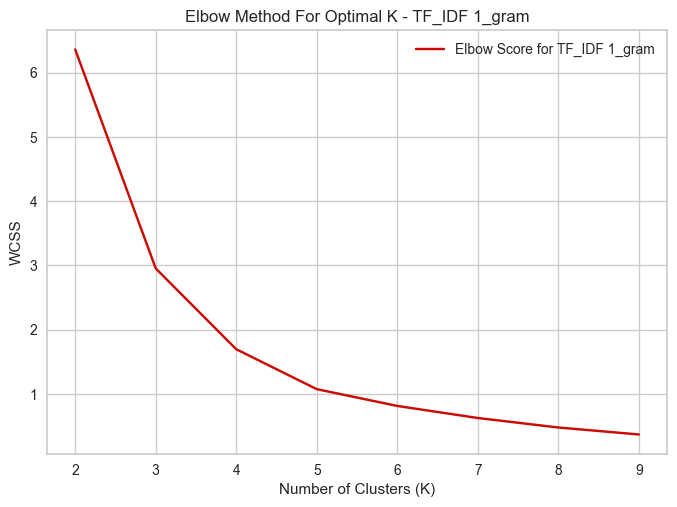

Method =  Doc2vec
The best silhouette score was 0.74819684 with k = 2
Elbow Score:  {'BOW': [3055.4304300481826, 1443.6652011619688, 918.3797171688766, 589.1812297978224, 426.7424419368805, 317.05853657259894, 234.8712059022527, 184.71377575843016], 'TF_IDF 1_gram': [6.360786979650215, 2.95206487515998, 1.694081729867948, 1.073095871815459, 0.8115541411209076, 0.6238669635539154, 0.4761012023346884, 0.3675314355010651], 'Doc2vec': [2383.909912109375, 1102.2664794921875, 754.3663330078125, 505.5587463378906, 360.7611083984375, 284.7591247558594, 223.84548950195312, 172.5365447998047], 'LDA': [604.8411785667137, 474.3507021596892, 346.5630764351246, 215.75235023515336, 110.27206347629519, 82.83697813541673, 73.21012405620472, 65.72791023246675]}
Silhoutee Score:  {'BOW': [0.6622966457893911, 0.6229911534142691, 0.5768139977149064, 0.5507091009288267, 0.5417685297707675, 0.5359683062748606, 0.5365225001268135, 0.5389798481980519], 'TF_IDF 1_gram': [0.6592005718953194, 0.5613498551110874, 

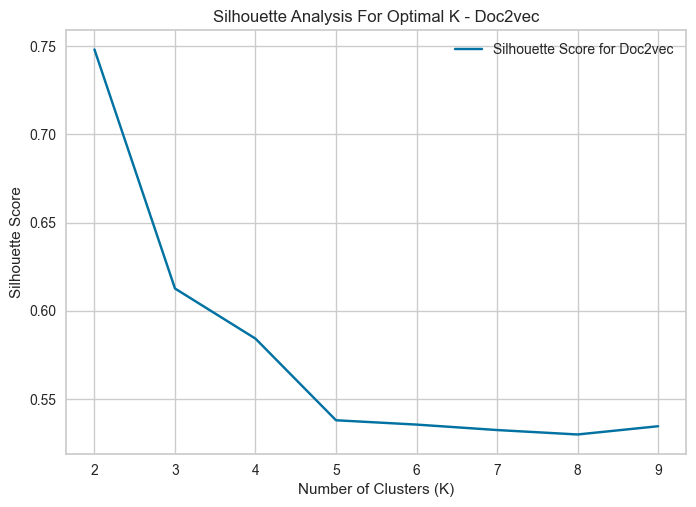

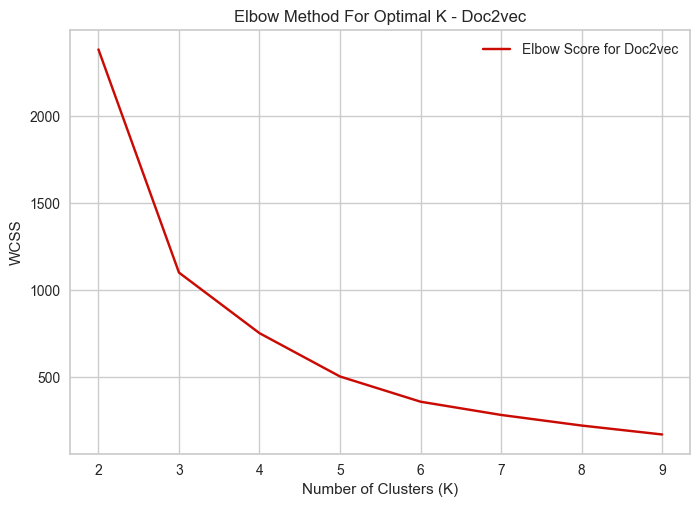

Method =  LDA
The best silhouette score was 0.7828667568391143 with k = 2
Elbow Score:  {'BOW': [3055.4304300481826, 1443.6652011619688, 918.3797171688766, 589.1812297978224, 426.7424419368805, 317.05853657259894, 234.8712059022527, 184.71377575843016], 'TF_IDF 1_gram': [6.360786979650215, 2.95206487515998, 1.694081729867948, 1.073095871815459, 0.8115541411209076, 0.6238669635539154, 0.4761012023346884, 0.3675314355010651], 'Doc2vec': [2383.909912109375, 1102.2664794921875, 754.3663330078125, 505.5587463378906, 360.7611083984375, 284.7591247558594, 223.84548950195312, 172.5365447998047], 'LDA': [21.780263052576124, 11.304901122818988, 5.051937141460094, 2.9890111061829927, 2.292301689652291, 1.6845671919806586, 1.2796543353039, 1.0065618554671047]}
Silhoutee Score:  {'BOW': [0.6622966457893911, 0.6229911534142691, 0.5768139977149064, 0.5507091009288267, 0.5417685297707675, 0.5359683062748606, 0.5365225001268135, 0.5389798481980519], 'TF_IDF 1_gram': [0.6592005718953194, 0.5613498551110

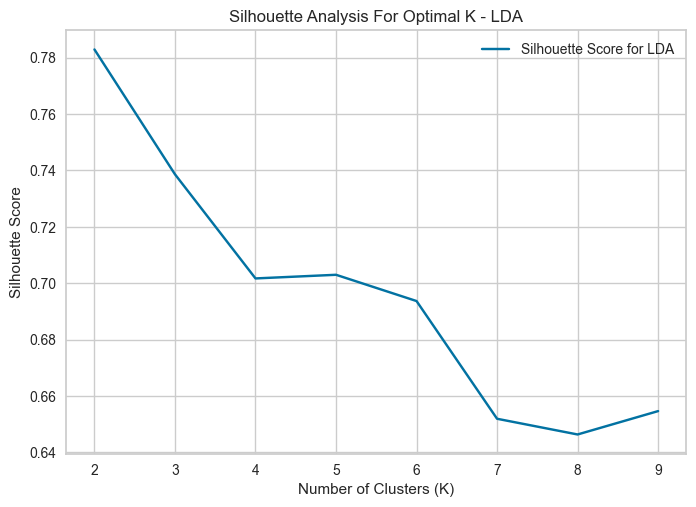

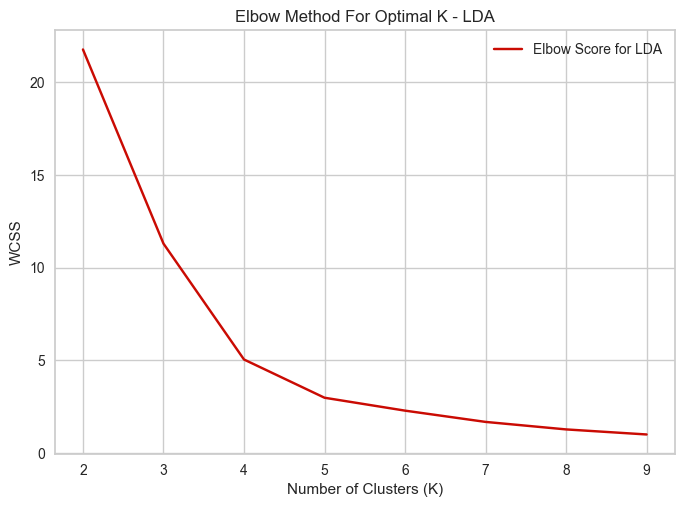

PCA =  2
Method =  BOW
The best silhouette score was 0.47465083821808085 with k = 3
Elbow Score:  {'BOW': [10069.308135088737, 5687.139370411027, 4081.5429519129693, 3028.474581398835, 2554.8930717421536, 2163.5165998291523, 1874.4359109037832, 1654.945925638716], 'TF_IDF 1_gram': [6.360786979650215, 2.95206487515998, 1.694081729867948, 1.073095871815459, 0.8115541411209076, 0.6238669635539154, 0.4761012023346884, 0.3675314355010651], 'Doc2vec': [2383.909912109375, 1102.2664794921875, 754.3663330078125, 505.5587463378906, 360.7611083984375, 284.7591247558594, 223.84548950195312, 172.5365447998047], 'LDA': [21.780263052576124, 11.304901122818988, 5.051937141460094, 2.9890111061829927, 2.292301689652291, 1.6845671919806586, 1.2796543353039, 1.0065618554671047]}
Silhoutee Score:  {'BOW': [0.4312422766347553, 0.47465083821808085, 0.44229643229609583, 0.43301823734180733, 0.387743091640177, 0.38425391853951135, 0.39193659468489617, 0.39141922911043997], 'TF_IDF 1_gram': [0.6592005718953194,

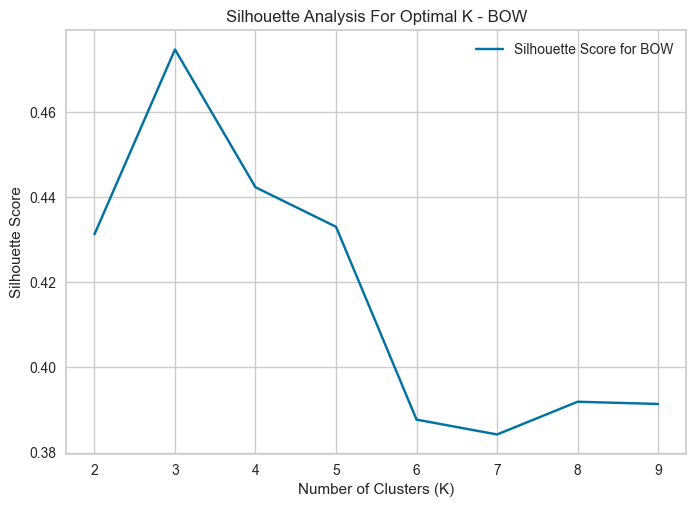

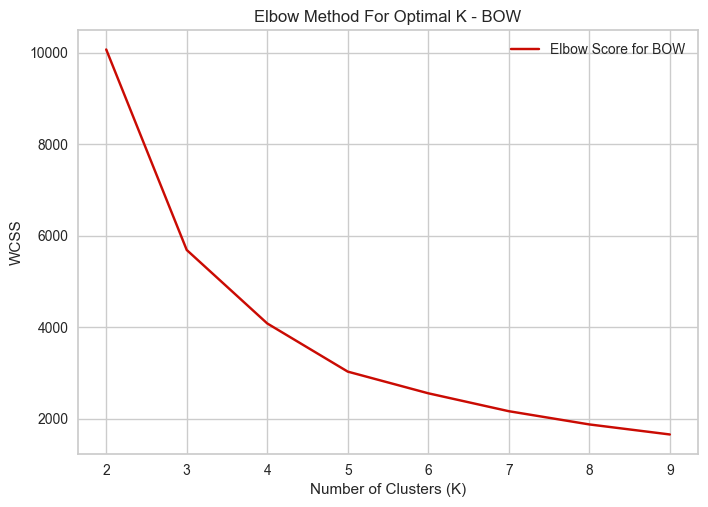

Method =  TF_IDF 1_gram
The best silhouette score was 0.5645789230960027 with k = 4
Elbow Score:  {'BOW': [10069.308135088737, 5687.139370411027, 4081.5429519129693, 3028.474581398835, 2554.8930717421536, 2163.5165998291523, 1874.4359109037832, 1654.945925638716], 'TF_IDF 1_gram': [22.205313787158314, 9.90629218924245, 4.6075986173085095, 3.6169396623507435, 2.78476704526899, 2.366653966824237, 1.9630318183803959, 1.674349835683727], 'Doc2vec': [2383.909912109375, 1102.2664794921875, 754.3663330078125, 505.5587463378906, 360.7611083984375, 284.7591247558594, 223.84548950195312, 172.5365447998047], 'LDA': [21.780263052576124, 11.304901122818988, 5.051937141460094, 2.9890111061829927, 2.292301689652291, 1.6845671919806586, 1.2796543353039, 1.0065618554671047]}
Silhoutee Score:  {'BOW': [0.4312422766347553, 0.47465083821808085, 0.44229643229609583, 0.43301823734180733, 0.387743091640177, 0.38425391853951135, 0.39193659468489617, 0.39141922911043997], 'TF_IDF 1_gram': [0.44486798581908443,

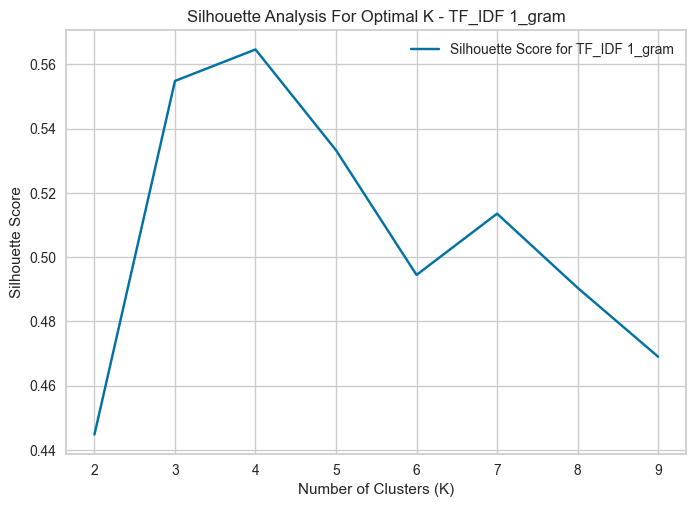

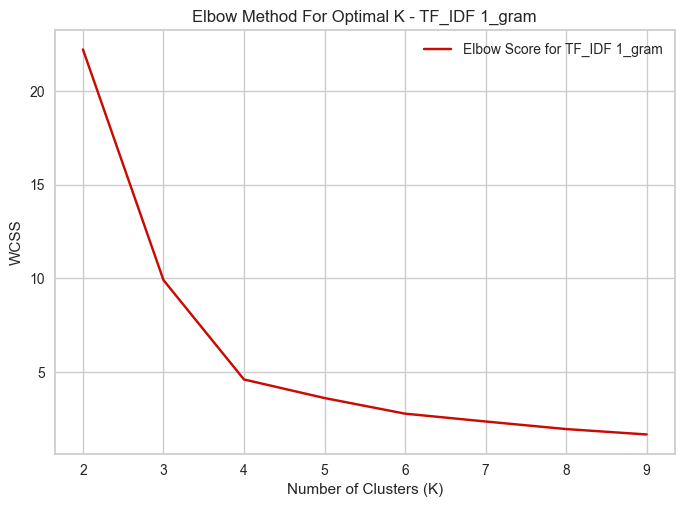

Method =  Doc2vec
The best silhouette score was 0.5223482 with k = 3
Elbow Score:  {'BOW': [10069.308135088737, 5687.139370411027, 4081.5429519129693, 3028.474581398835, 2554.8930717421536, 2163.5165998291523, 1874.4359109037832, 1654.945925638716], 'TF_IDF 1_gram': [22.205313787158314, 9.90629218924245, 4.6075986173085095, 3.6169396623507435, 2.78476704526899, 2.366653966824237, 1.9630318183803959, 1.674349835683727], 'Doc2vec': [12443.7763671875, 5830.70361328125, 4301.3994140625, 3579.3671875, 3098.125, 2631.180419921875, 2388.33251953125, 2148.2509765625], 'LDA': [21.780263052576124, 11.304901122818988, 5.051937141460094, 2.9890111061829927, 2.292301689652291, 1.6845671919806586, 1.2796543353039, 1.0065618554671047]}
Silhoutee Score:  {'BOW': [0.4312422766347553, 0.47465083821808085, 0.44229643229609583, 0.43301823734180733, 0.387743091640177, 0.38425391853951135, 0.39193659468489617, 0.39141922911043997], 'TF_IDF 1_gram': [0.44486798581908443, 0.5547919822702255, 0.564578923096002

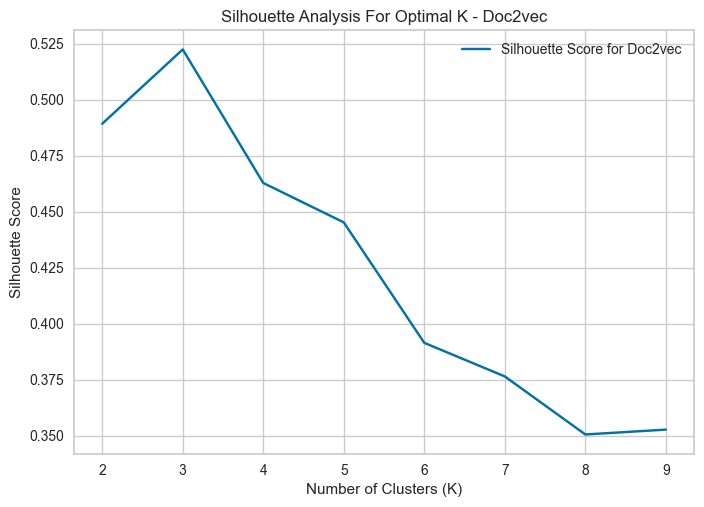

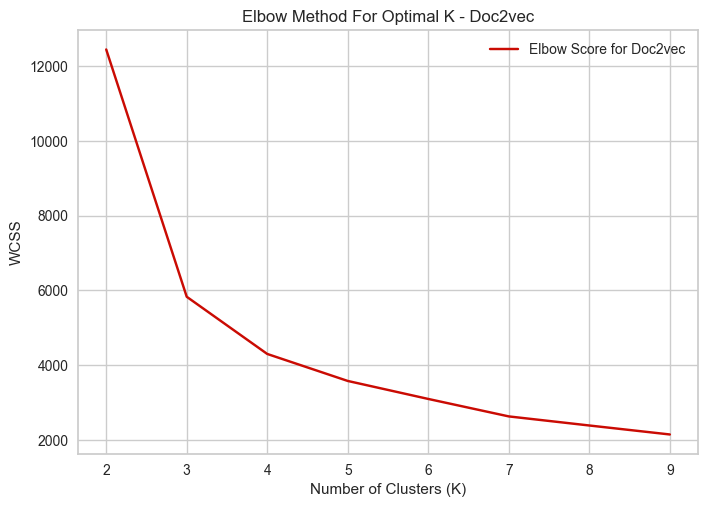

Method =  LDA
The best silhouette score was 0.6518359715883346 with k = 4
Elbow Score:  {'BOW': [10069.308135088737, 5687.139370411027, 4081.5429519129693, 3028.474581398835, 2554.8930717421536, 2163.5165998291523, 1874.4359109037832, 1654.945925638716], 'TF_IDF 1_gram': [22.205313787158314, 9.90629218924245, 4.6075986173085095, 3.6169396623507435, 2.78476704526899, 2.366653966824237, 1.9630318183803959, 1.674349835683727], 'Doc2vec': [12443.7763671875, 5830.70361328125, 4301.3994140625, 3579.3671875, 3098.125, 2631.180419921875, 2388.33251953125, 2148.2509765625], 'LDA': [171.41043208453743, 77.69553980914687, 36.98478611334743, 29.20146286067341, 22.7027152653209, 17.018916313498135, 14.554779537654277, 12.584807443767343]}
Silhoutee Score:  {'BOW': [0.4312422766347553, 0.47465083821808085, 0.44229643229609583, 0.43301823734180733, 0.387743091640177, 0.38425391853951135, 0.39193659468489617, 0.39141922911043997], 'TF_IDF 1_gram': [0.44486798581908443, 0.5547919822702255, 0.5645789230

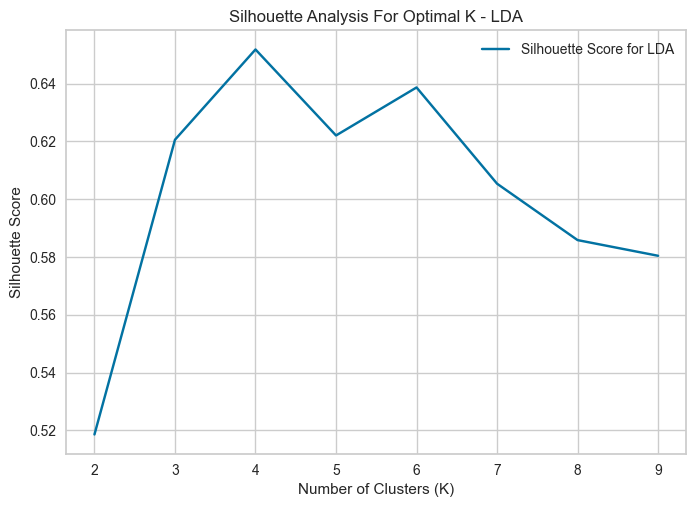

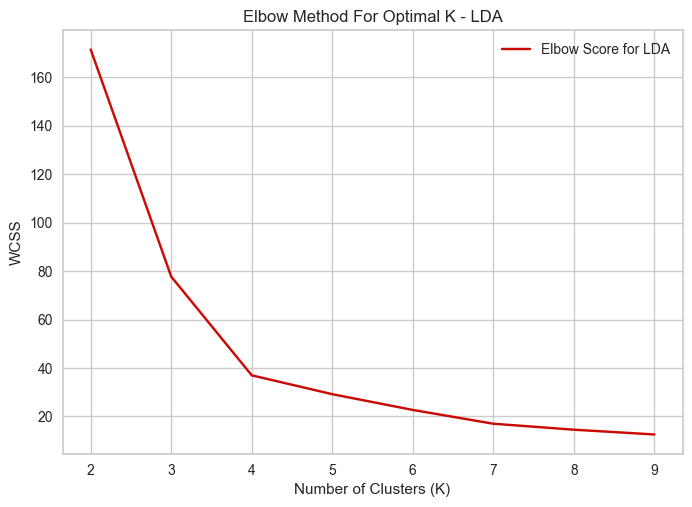

PCA =  3
Method =  BOW
The best silhouette score was 0.4537230799610871 with k = 5
Elbow Score:  {'BOW': [16084.78715822121, 11429.893489273192, 7700.032785202531, 5363.766070050406, 4169.893443217883, 3699.06869049972, 3294.9202475592247, 2955.9605459562913], 'TF_IDF 1_gram': [22.205313787158314, 9.90629218924245, 4.6075986173085095, 3.6169396623507435, 2.78476704526899, 2.366653966824237, 1.9630318183803959, 1.674349835683727], 'Doc2vec': [12443.7763671875, 5830.70361328125, 4301.3994140625, 3579.3671875, 3098.125, 2631.180419921875, 2388.33251953125, 2148.2509765625], 'LDA': [171.41043208453743, 77.69553980914687, 36.98478611334743, 29.20146286067341, 22.7027152653209, 17.018916313498135, 14.554779537654277, 12.584807443767343]}
Silhoutee Score:  {'BOW': [0.34903281400086794, 0.3650956949304924, 0.42230665254727423, 0.4537230799610871, 0.4424024012344547, 0.3853161581041093, 0.3879079233358084, 0.3832273762336514], 'TF_IDF 1_gram': [0.44486798581908443, 0.5547919822702255, 0.5645789

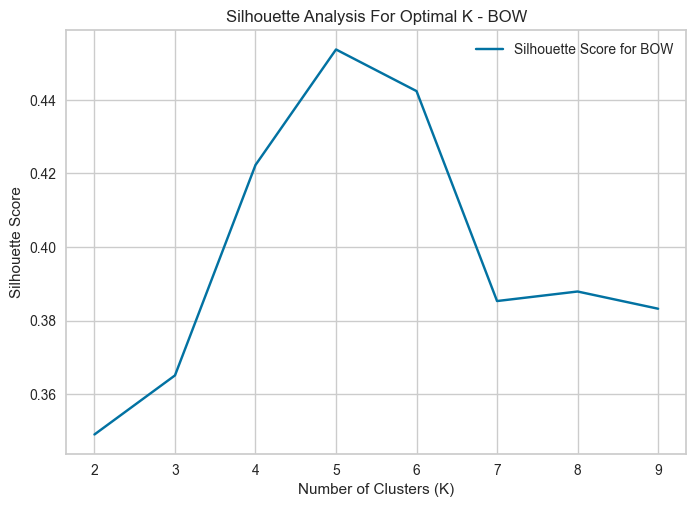

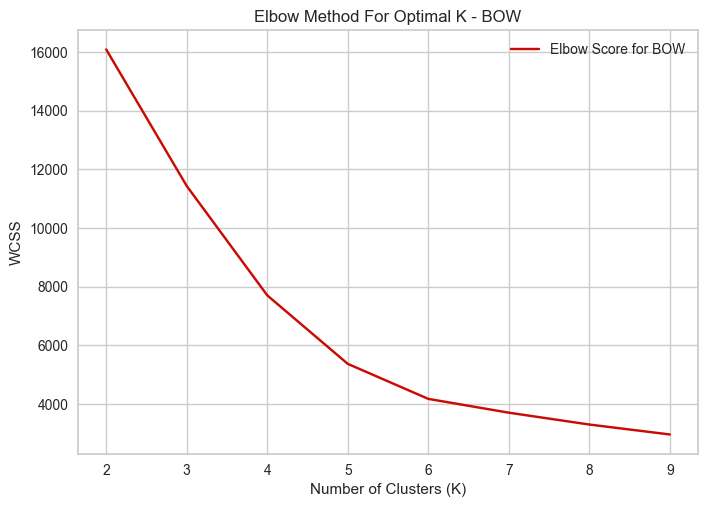

Method =  TF_IDF 1_gram
The best silhouette score was 0.5487154717686125 with k = 6
Elbow Score:  {'BOW': [16084.78715822121, 11429.893489273192, 7700.032785202531, 5363.766070050406, 4169.893443217883, 3699.06869049972, 3294.9202475592247, 2955.9605459562913], 'TF_IDF 1_gram': [38.66210170630953, 25.372150378965344, 14.249895910638841, 7.8519403138927615, 5.986893493198119, 4.942796498147645, 4.186990557755248, 3.6591324082827636], 'Doc2vec': [12443.7763671875, 5830.70361328125, 4301.3994140625, 3579.3671875, 3098.125, 2631.180419921875, 2388.33251953125, 2148.2509765625], 'LDA': [171.41043208453743, 77.69553980914687, 36.98478611334743, 29.20146286067341, 22.7027152653209, 17.018916313498135, 14.554779537654277, 12.584807443767343]}
Silhoutee Score:  {'BOW': [0.34903281400086794, 0.3650956949304924, 0.42230665254727423, 0.4537230799610871, 0.4424024012344547, 0.3853161581041093, 0.3879079233358084, 0.3832273762336514], 'TF_IDF 1_gram': [0.3049887584868524, 0.40980780659237104, 0.4995

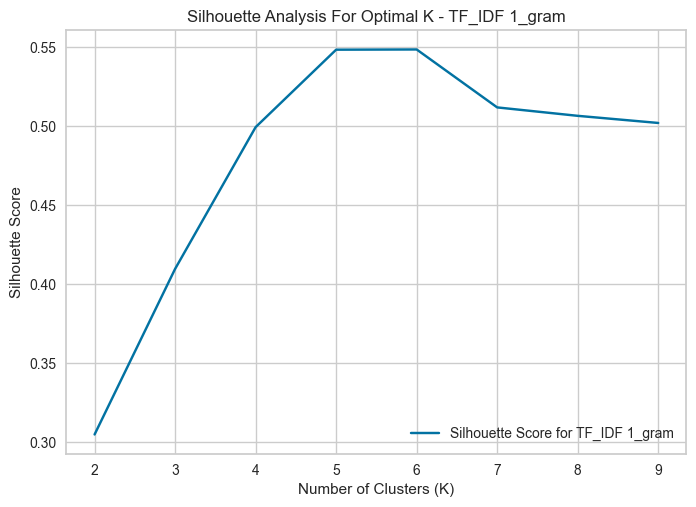

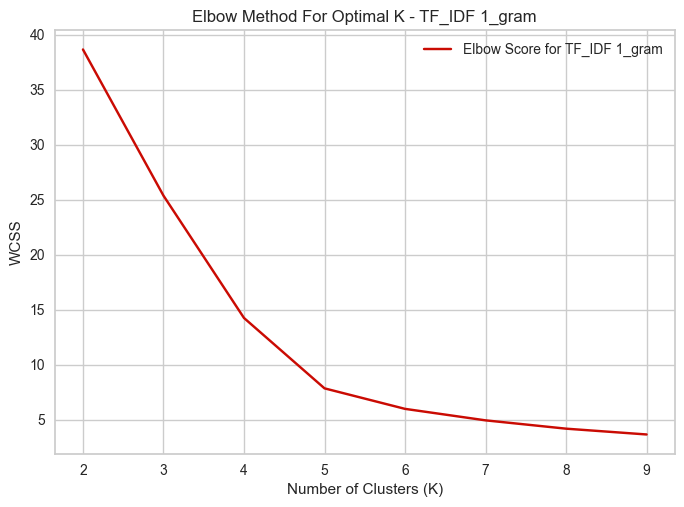

Method =  Doc2vec
The best silhouette score was 0.4757834 with k = 4
Elbow Score:  {'BOW': [16084.78715822121, 11429.893489273192, 7700.032785202531, 5363.766070050406, 4169.893443217883, 3699.06869049972, 3294.9202475592247, 2955.9605459562913], 'TF_IDF 1_gram': [38.66210170630953, 25.372150378965344, 14.249895910638841, 7.8519403138927615, 5.986893493198119, 4.942796498147645, 4.186990557755248, 3.6591324082827636], 'Doc2vec': [21468.44921875, 14420.62890625, 8837.626953125, 6593.0634765625, 5705.0947265625, 5168.61083984375, 4807.1669921875, 4485.6982421875], 'LDA': [171.41043208453743, 77.69553980914687, 36.98478611334743, 29.20146286067341, 22.7027152653209, 17.018916313498135, 14.554779537654277, 12.584807443767343]}
Silhoutee Score:  {'BOW': [0.34903281400086794, 0.3650956949304924, 0.42230665254727423, 0.4537230799610871, 0.4424024012344547, 0.3853161581041093, 0.3879079233358084, 0.3832273762336514], 'TF_IDF 1_gram': [0.3049887584868524, 0.40980780659237104, 0.4995466392255376

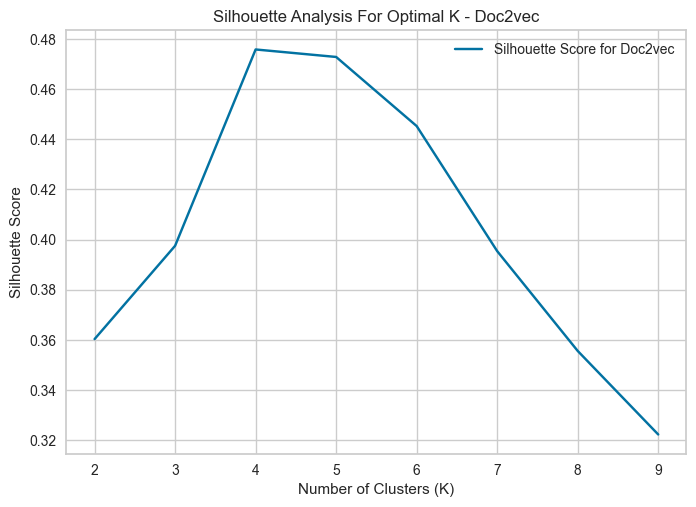

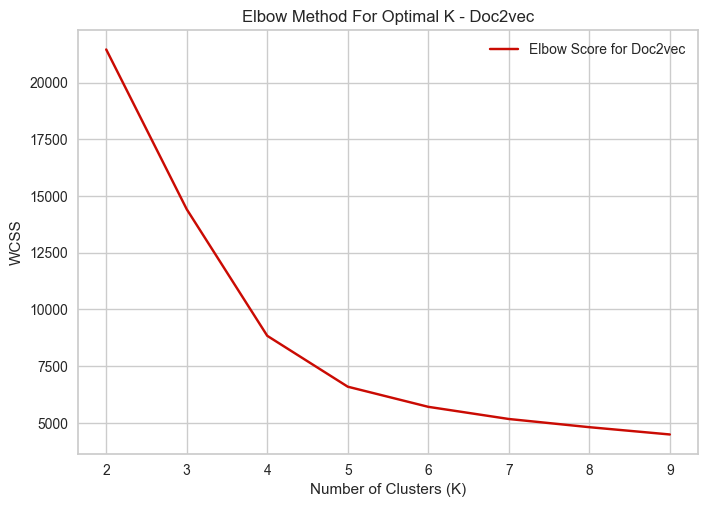

Method =  LDA
The best silhouette score was 0.6333068708585808 with k = 6
Elbow Score:  {'BOW': [16084.78715822121, 11429.893489273192, 7700.032785202531, 5363.766070050406, 4169.893443217883, 3699.06869049972, 3294.9202475592247, 2955.9605459562913], 'TF_IDF 1_gram': [38.66210170630953, 25.372150378965344, 14.249895910638841, 7.8519403138927615, 5.986893493198119, 4.942796498147645, 4.186990557755248, 3.6591324082827636], 'Doc2vec': [21468.44921875, 14420.62890625, 8837.626953125, 6593.0634765625, 5705.0947265625, 5168.61083984375, 4807.1669921875, 4485.6982421875], 'LDA': [315.83431173674467, 193.94838884775737, 91.00651628229785, 58.03389814583149, 42.78276613656911, 35.731025390731574, 28.693860416491077, 24.877666541461764]}
Silhoutee Score:  {'BOW': [0.34903281400086794, 0.3650956949304924, 0.42230665254727423, 0.4537230799610871, 0.4424024012344547, 0.3853161581041093, 0.3879079233358084, 0.3832273762336514], 'TF_IDF 1_gram': [0.3049887584868524, 0.40980780659237104, 0.499546639

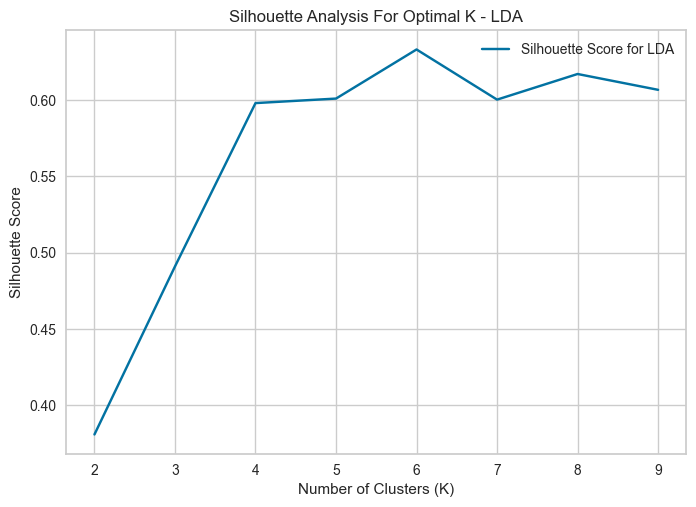

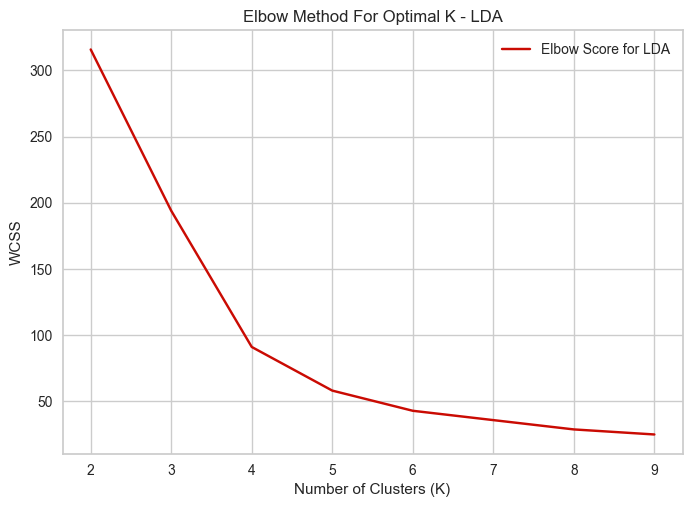

PCA =  4
Method =  BOW
The best silhouette score was 0.450626903100276 with k = 6
Elbow Score:  {'BOW': [20579.73349521467, 15681.827169307078, 11293.49850802388, 8393.569444112982, 6255.204430520765, 5230.344205770535, 4759.549444870428, 4351.120172610043], 'TF_IDF 1_gram': [38.66210170630953, 25.372150378965344, 14.249895910638841, 7.8519403138927615, 5.986893493198119, 4.942796498147645, 4.186990557755248, 3.6591324082827636], 'Doc2vec': [21468.44921875, 14420.62890625, 8837.626953125, 6593.0634765625, 5705.0947265625, 5168.61083984375, 4807.1669921875, 4485.6982421875], 'LDA': [315.83431173674467, 193.94838884775737, 91.00651628229785, 58.03389814583149, 42.78276613656911, 35.731025390731574, 28.693860416491077, 24.877666541461764]}
Silhoutee Score:  {'BOW': [0.3210720869939729, 0.35091892188388535, 0.38911094084749664, 0.42181285529406903, 0.450626903100276, 0.4199220022462574, 0.4174995765092037, 0.37591963340296897], 'TF_IDF 1_gram': [0.3049887584868524, 0.40980780659237104, 0.4

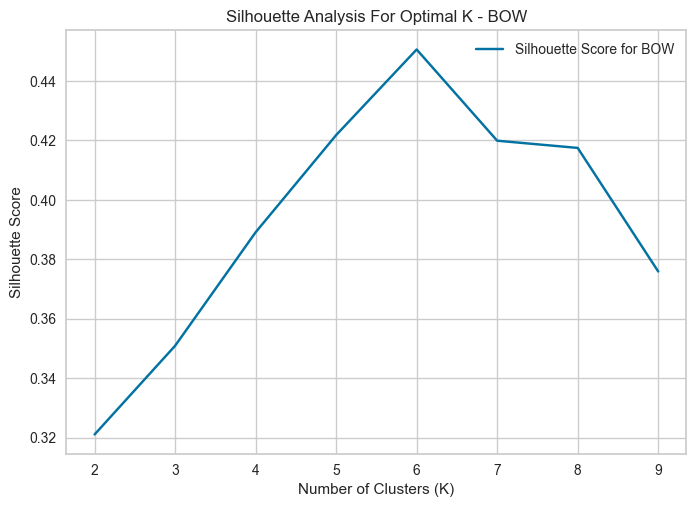

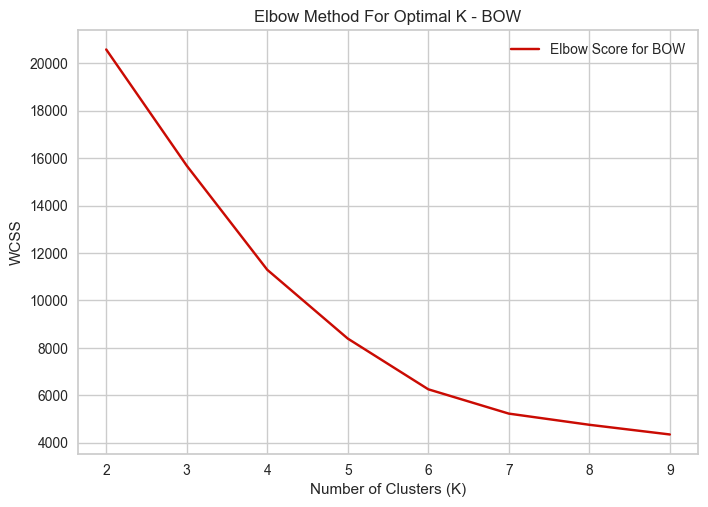

Method =  TF_IDF 1_gram
The best silhouette score was 0.5561480857892012 with k = 6
Elbow Score:  {'BOW': [20579.73349521467, 15681.827169307078, 11293.49850802388, 8393.569444112982, 6255.204430520765, 5230.344205770535, 4759.549444870428, 4351.120172610043], 'TF_IDF 1_gram': [52.47053411846726, 39.530186027690185, 26.644991383053114, 15.438702831232971, 8.789575780906603, 7.288799991677343, 6.2453499483646056, 5.358695875355426], 'Doc2vec': [21468.44921875, 14420.62890625, 8837.626953125, 6593.0634765625, 5705.0947265625, 5168.61083984375, 4807.1669921875, 4485.6982421875], 'LDA': [315.83431173674467, 193.94838884775737, 91.00651628229785, 58.03389814583149, 42.78276613656911, 35.731025390731574, 28.693860416491077, 24.877666541461764]}
Silhoutee Score:  {'BOW': [0.3210720869939729, 0.35091892188388535, 0.38911094084749664, 0.42181285529406903, 0.450626903100276, 0.4199220022462574, 0.4174995765092037, 0.37591963340296897], 'TF_IDF 1_gram': [0.3108099206995459, 0.3823192012187676, 0.

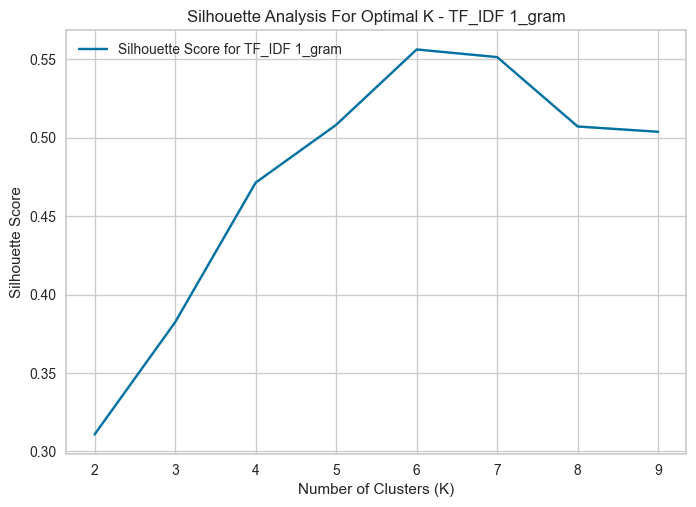

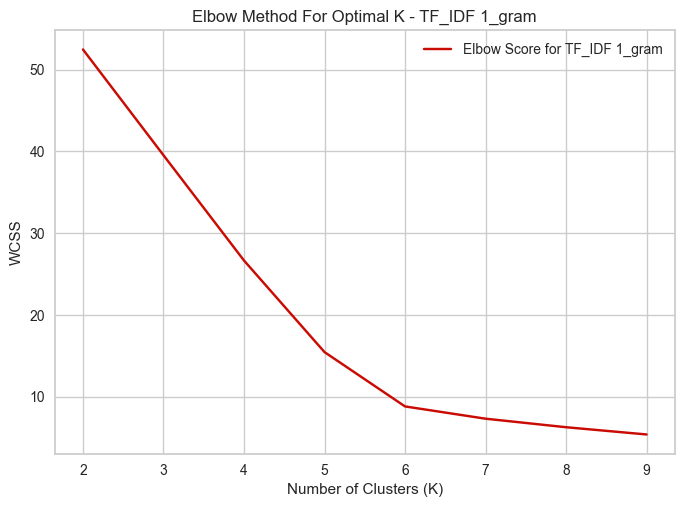

Method =  Doc2vec
The best silhouette score was 0.48536316 with k = 5
Elbow Score:  {'BOW': [20579.73349521467, 15681.827169307078, 11293.49850802388, 8393.569444112982, 6255.204430520765, 5230.344205770535, 4759.549444870428, 4351.120172610043], 'TF_IDF 1_gram': [52.47053411846726, 39.530186027690185, 26.644991383053114, 15.438702831232971, 8.789575780906603, 7.288799991677343, 6.2453499483646056, 5.358695875355426], 'Doc2vec': [28844.6640625, 21658.8046875, 15243.017578125, 9899.4111328125, 8770.197265625, 7833.826171875, 7500.4873046875, 7118.89013671875], 'LDA': [315.83431173674467, 193.94838884775737, 91.00651628229785, 58.03389814583149, 42.78276613656911, 35.731025390731574, 28.693860416491077, 24.877666541461764]}
Silhoutee Score:  {'BOW': [0.3210720869939729, 0.35091892188388535, 0.38911094084749664, 0.42181285529406903, 0.450626903100276, 0.4199220022462574, 0.4174995765092037, 0.37591963340296897], 'TF_IDF 1_gram': [0.3108099206995459, 0.3823192012187676, 0.4712755147001601,

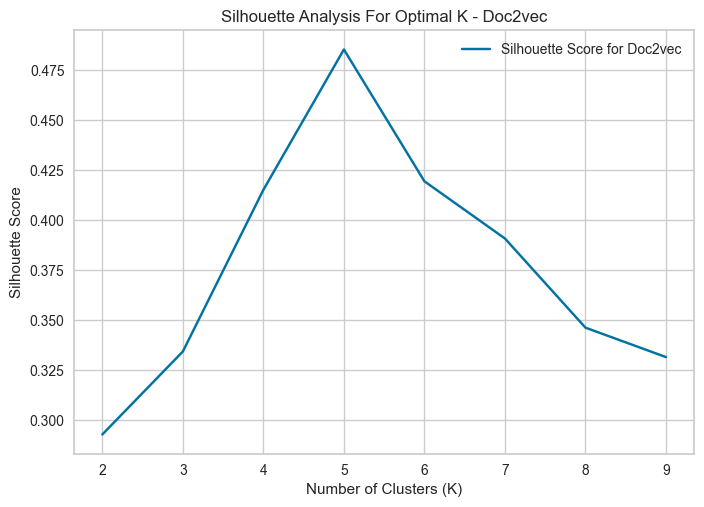

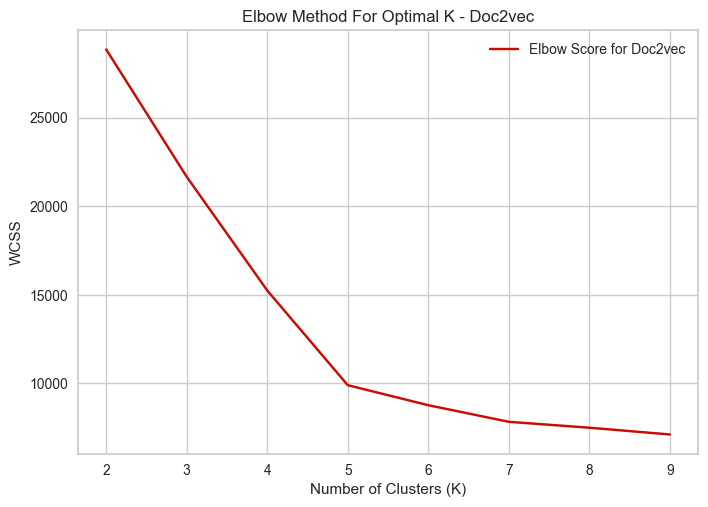

Method =  LDA
The best silhouette score was 0.6302103475868563 with k = 6
Elbow Score:  {'BOW': [20579.73349521467, 15681.827169307078, 11293.49850802388, 8393.569444112982, 6255.204430520765, 5230.344205770535, 4759.549444870428, 4351.120172610043], 'TF_IDF 1_gram': [52.47053411846726, 39.530186027690185, 26.644991383053114, 15.438702831232971, 8.789575780906603, 7.288799991677343, 6.2453499483646056, 5.358695875355426], 'Doc2vec': [28844.6640625, 21658.8046875, 15243.017578125, 9899.4111328125, 8770.197265625, 7833.826171875, 7500.4873046875, 7118.89013671875], 'LDA': [460.37875587912936, 321.3234818767042, 199.11431478548621, 91.79981392245548, 61.08863125283835, 51.79478350977364, 44.40512145385763, 38.841024937907086]}
Silhoutee Score:  {'BOW': [0.3210720869939729, 0.35091892188388535, 0.38911094084749664, 0.42181285529406903, 0.450626903100276, 0.4199220022462574, 0.4174995765092037, 0.37591963340296897], 'TF_IDF 1_gram': [0.3108099206995459, 0.3823192012187676, 0.471275514700160

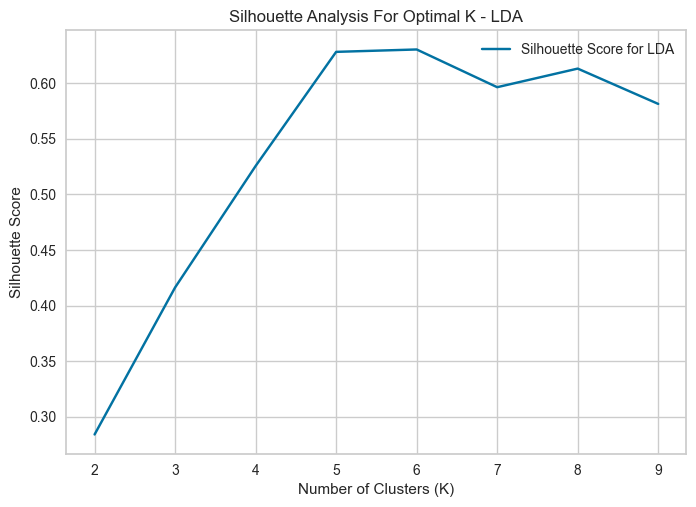

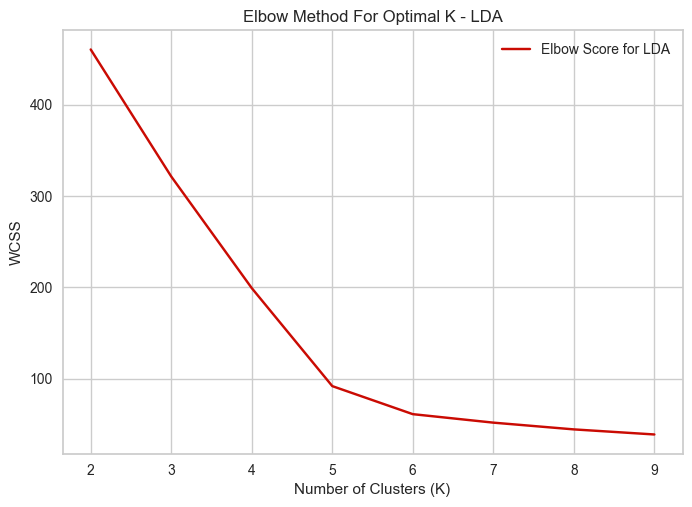

PCA =  5
Method =  BOW
The best silhouette score was 0.4640488492342701 with k = 6
Elbow Score:  {'BOW': [24833.795328166656, 19682.8480030804, 14981.411354060858, 10943.731830379456, 7660.112135448507, 6558.42025635727, 5960.941378308272, 5446.173836768143], 'TF_IDF 1_gram': [52.47053411846726, 39.530186027690185, 26.644991383053114, 15.438702831232971, 8.789575780906603, 7.288799991677343, 6.2453499483646056, 5.358695875355426], 'Doc2vec': [28844.6640625, 21658.8046875, 15243.017578125, 9899.4111328125, 8770.197265625, 7833.826171875, 7500.4873046875, 7118.89013671875], 'LDA': [460.37875587912936, 321.3234818767042, 199.11431478548621, 91.79981392245548, 61.08863125283835, 51.79478350977364, 44.40512145385763, 38.841024937907086]}
Silhoutee Score:  {'BOW': [0.291131781253287, 0.31835428158363915, 0.3610598773709243, 0.4164798628317555, 0.4640488492342701, 0.40213156952579926, 0.3837145450318806, 0.3800616367497322], 'TF_IDF 1_gram': [0.3108099206995459, 0.3823192012187676, 0.47127551

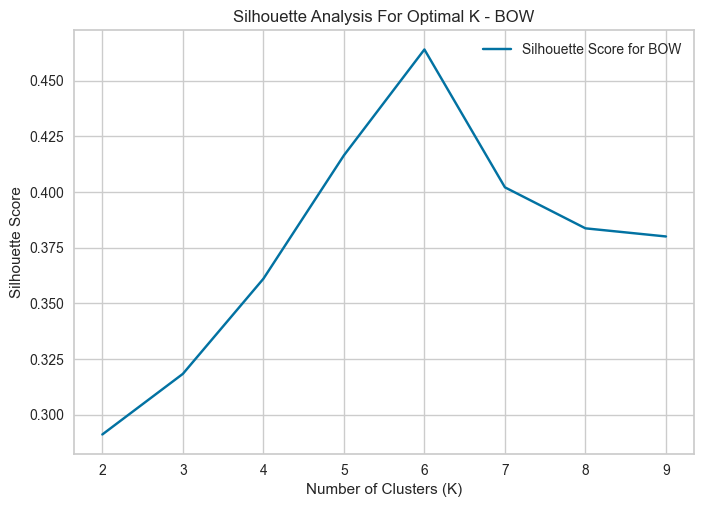

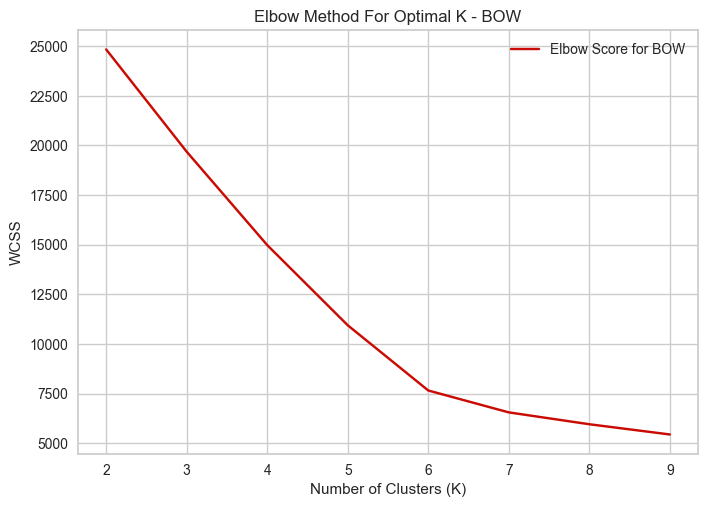

Method =  TF_IDF 1_gram
The best silhouette score was 0.5847799852904453 with k = 6
Elbow Score:  {'BOW': [24833.795328166656, 19682.8480030804, 14981.411354060858, 10943.731830379456, 7660.112135448507, 6558.42025635727, 5960.941378308272, 5446.173836768143], 'TF_IDF 1_gram': [63.61736752717625, 49.17098864841343, 36.14711286672171, 23.812246662610548, 12.051931553605435, 10.142061937617685, 8.779481231155374, 7.667863255687247], 'Doc2vec': [28844.6640625, 21658.8046875, 15243.017578125, 9899.4111328125, 8770.197265625, 7833.826171875, 7500.4873046875, 7118.89013671875], 'LDA': [460.37875587912936, 321.3234818767042, 199.11431478548621, 91.79981392245548, 61.08863125283835, 51.79478350977364, 44.40512145385763, 38.841024937907086]}
Silhoutee Score:  {'BOW': [0.291131781253287, 0.31835428158363915, 0.3610598773709243, 0.4164798628317555, 0.4640488492342701, 0.40213156952579926, 0.3837145450318806, 0.3800616367497322], 'TF_IDF 1_gram': [0.28582845654948325, 0.3519962679331965, 0.4365111

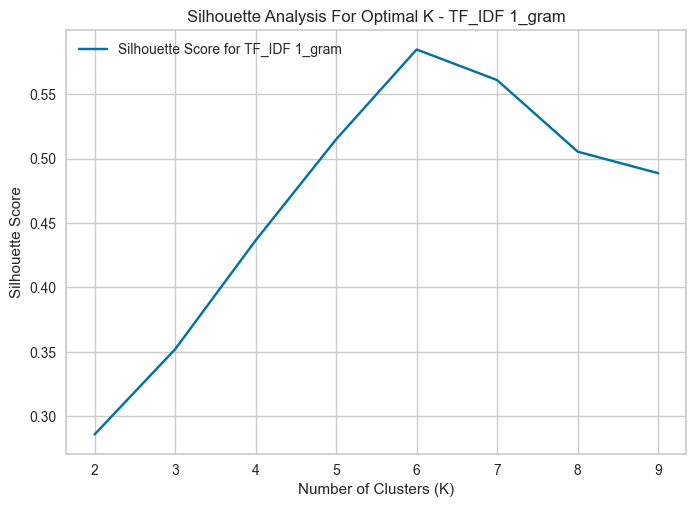

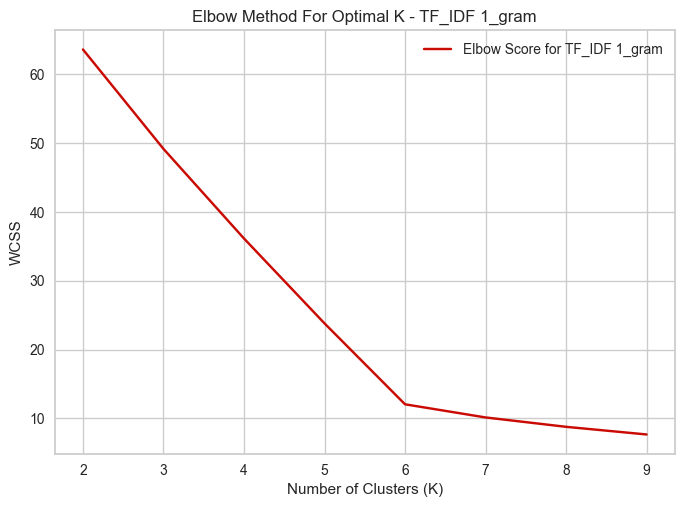

Method =  Doc2vec
The best silhouette score was 0.44532165 with k = 6
Elbow Score:  {'BOW': [24833.795328166656, 19682.8480030804, 14981.411354060858, 10943.731830379456, 7660.112135448507, 6558.42025635727, 5960.941378308272, 5446.173836768143], 'TF_IDF 1_gram': [63.61736752717625, 49.17098864841343, 36.14711286672171, 23.812246662610548, 12.051931553605435, 10.142061937617685, 8.779481231155374, 7.667863255687247], 'Doc2vec': [35143.328125, 27883.326171875, 21953.841796875, 15922.7421875, 12105.2412109375, 10323.5390625, 9944.9912109375, 9585.396484375], 'LDA': [460.37875587912936, 321.3234818767042, 199.11431478548621, 91.79981392245548, 61.08863125283835, 51.79478350977364, 44.40512145385763, 38.841024937907086]}
Silhoutee Score:  {'BOW': [0.291131781253287, 0.31835428158363915, 0.3610598773709243, 0.4164798628317555, 0.4640488492342701, 0.40213156952579926, 0.3837145450318806, 0.3800616367497322], 'TF_IDF 1_gram': [0.28582845654948325, 0.3519962679331965, 0.43651118011128687, 0.51

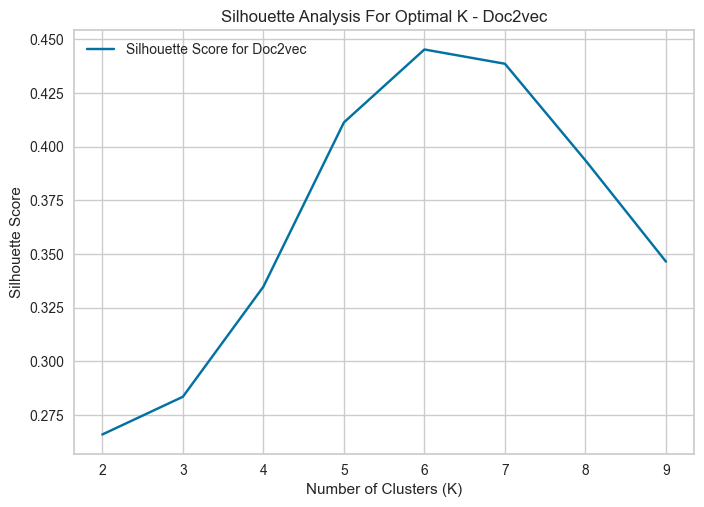

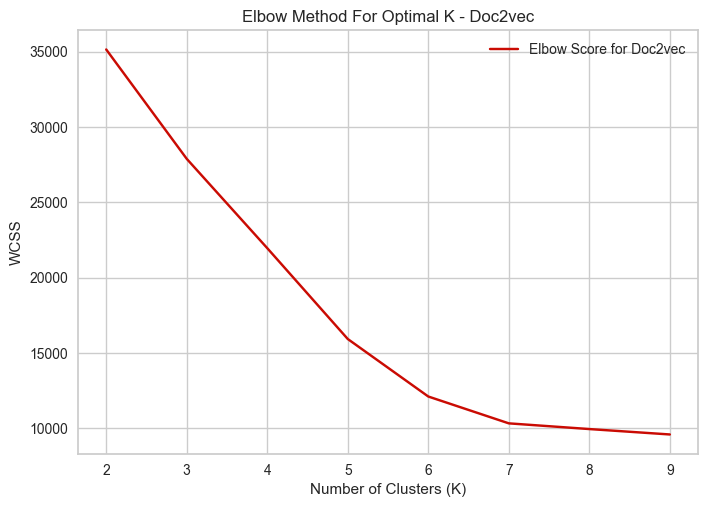

Method =  LDA
The best silhouette score was 0.6676855464902739 with k = 6
Elbow Score:  {'BOW': [24833.795328166656, 19682.8480030804, 14981.411354060858, 10943.731830379456, 7660.112135448507, 6558.42025635727, 5960.941378308272, 5446.173836768143], 'TF_IDF 1_gram': [63.61736752717625, 49.17098864841343, 36.14711286672171, 23.812246662610548, 12.051931553605435, 10.142061937617685, 8.779481231155374, 7.667863255687247], 'Doc2vec': [35143.328125, 27883.326171875, 21953.841796875, 15922.7421875, 12105.2412109375, 10323.5390625, 9944.9912109375, 9585.396484375], 'LDA': [578.1225827393802, 437.4656236163934, 307.4651739374871, 190.00923077161096, 85.55539318716498, 72.64633949883148, 63.23394961945088, 55.82900176843413]}
Silhoutee Score:  {'BOW': [0.291131781253287, 0.31835428158363915, 0.3610598773709243, 0.4164798628317555, 0.4640488492342701, 0.40213156952579926, 0.3837145450318806, 0.3800616367497322], 'TF_IDF 1_gram': [0.28582845654948325, 0.3519962679331965, 0.43651118011128687, 0.

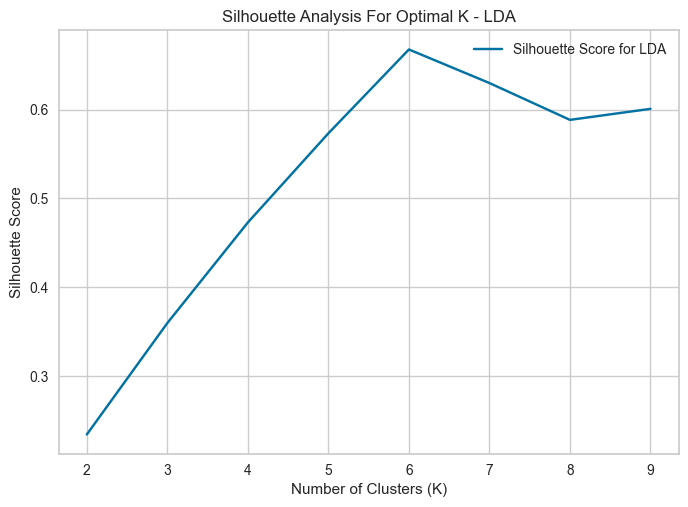

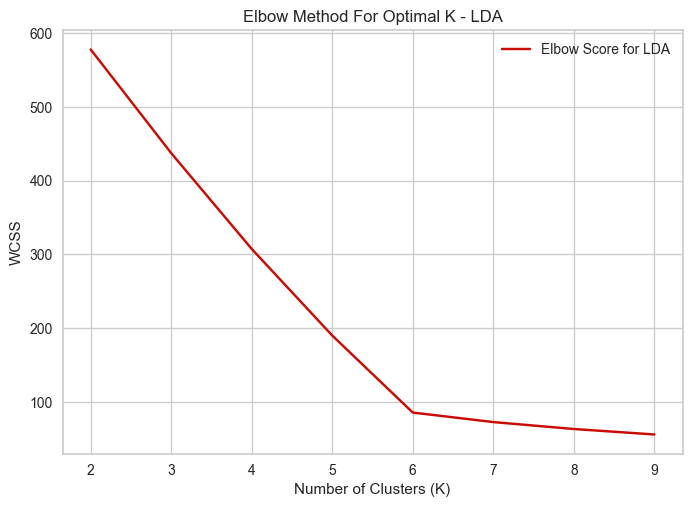

PCA =  6
Method =  BOW
The best silhouette score was 0.4217051647684601 with k = 6
Elbow Score:  {'BOW': [28016.572186276757, 22800.86413735339, 17962.35475548705, 13875.358899963214, 10556.966879441083, 8477.221186123239, 7674.3485419323915, 7076.232847593783], 'TF_IDF 1_gram': [63.61736752717625, 49.17098864841343, 36.14711286672171, 23.812246662610548, 12.051931553605435, 10.142061937617685, 8.779481231155374, 7.667863255687247], 'Doc2vec': [35143.328125, 27883.326171875, 21953.841796875, 15922.7421875, 12105.2412109375, 10323.5390625, 9944.9912109375, 9585.396484375], 'LDA': [578.1225827393802, 437.4656236163934, 307.4651739374871, 190.00923077161096, 85.55539318716498, 72.64633949883148, 63.23394961945088, 55.82900176843413]}
Silhoutee Score:  {'BOW': [0.2589821450608005, 0.2703847358198904, 0.332162257947445, 0.37916010743032, 0.4217051647684601, 0.416625555317076, 0.39300447904597763, 0.37469191489695347], 'TF_IDF 1_gram': [0.28582845654948325, 0.3519962679331965, 0.436511180111

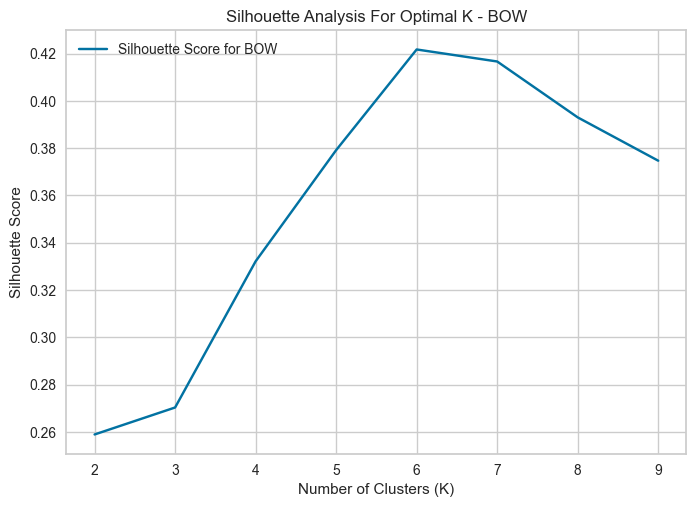

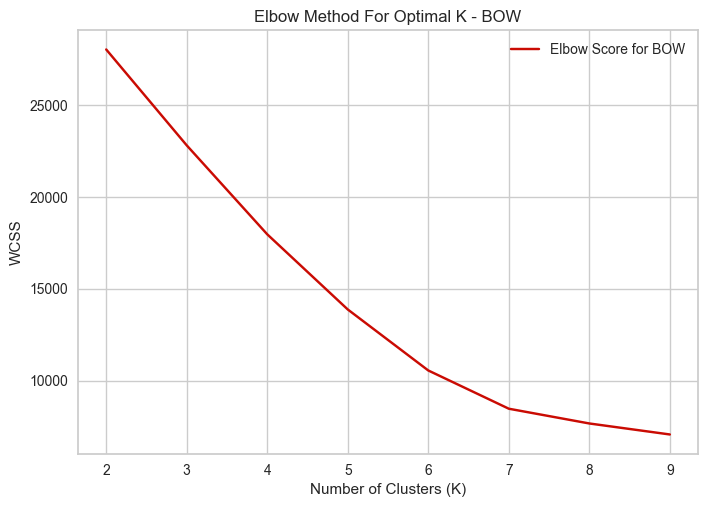

Method =  TF_IDF 1_gram
The best silhouette score was 0.5879805212468276 with k = 7
Elbow Score:  {'BOW': [28016.572186276757, 22800.86413735339, 17962.35475548705, 13875.358899963214, 10556.966879441083, 8477.221186123239, 7674.3485419323915, 7076.232847593783], 'TF_IDF 1_gram': [73.52232794538239, 58.7050418931659, 45.68051925683876, 33.23625276764592, 21.38530046727661, 13.724945097373086, 11.177601558501017, 9.969104863968397], 'Doc2vec': [35143.328125, 27883.326171875, 21953.841796875, 15922.7421875, 12105.2412109375, 10323.5390625, 9944.9912109375, 9585.396484375], 'LDA': [578.1225827393802, 437.4656236163934, 307.4651739374871, 190.00923077161096, 85.55539318716498, 72.64633949883148, 63.23394961945088, 55.82900176843413]}
Silhoutee Score:  {'BOW': [0.2589821450608005, 0.2703847358198904, 0.332162257947445, 0.37916010743032, 0.4217051647684601, 0.416625555317076, 0.39300447904597763, 0.37469191489695347], 'TF_IDF 1_gram': [0.2353319296953313, 0.31857495103387073, 0.3958554129743

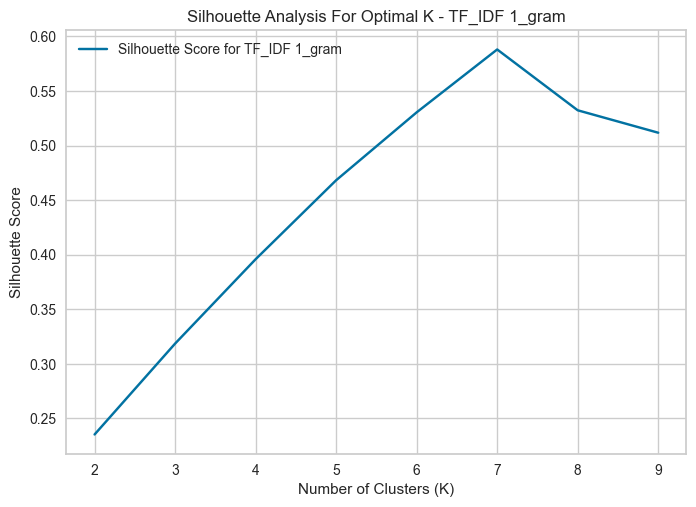

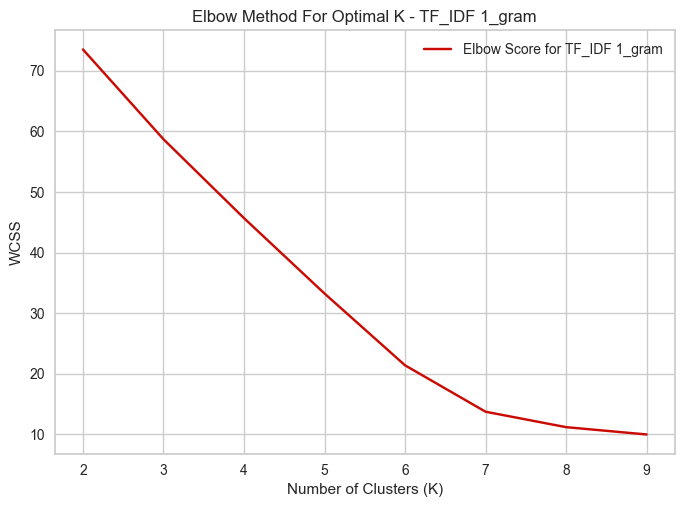

Method =  Doc2vec
The best silhouette score was 0.45860347 with k = 7
Elbow Score:  {'BOW': [28016.572186276757, 22800.86413735339, 17962.35475548705, 13875.358899963214, 10556.966879441083, 8477.221186123239, 7674.3485419323915, 7076.232847593783], 'TF_IDF 1_gram': [73.52232794538239, 58.7050418931659, 45.68051925683876, 33.23625276764592, 21.38530046727661, 13.724945097373086, 11.177601558501017, 9.969104863968397], 'Doc2vec': [40889.19921875, 33648.5859375, 26863.79296875, 21344.40625, 17018.576171875, 12835.7900390625, 12396.404296875, 12000.330078125], 'LDA': [578.1225827393802, 437.4656236163934, 307.4651739374871, 190.00923077161096, 85.55539318716498, 72.64633949883148, 63.23394961945088, 55.82900176843413]}
Silhoutee Score:  {'BOW': [0.2589821450608005, 0.2703847358198904, 0.332162257947445, 0.37916010743032, 0.4217051647684601, 0.416625555317076, 0.39300447904597763, 0.37469191489695347], 'TF_IDF 1_gram': [0.2353319296953313, 0.31857495103387073, 0.39585541297434107, 0.468195

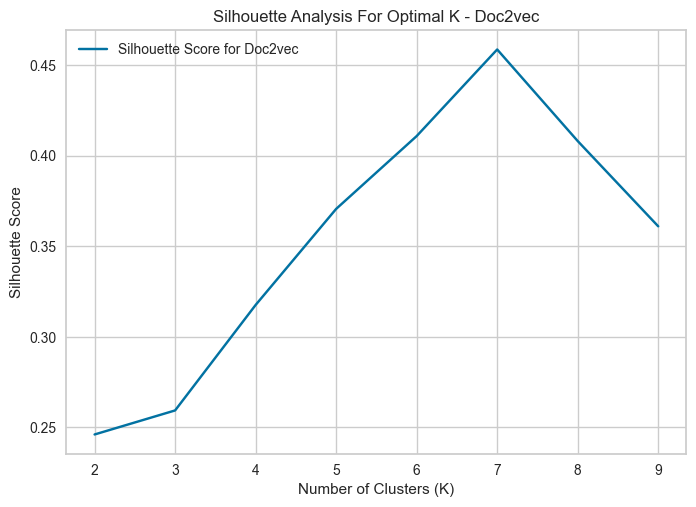

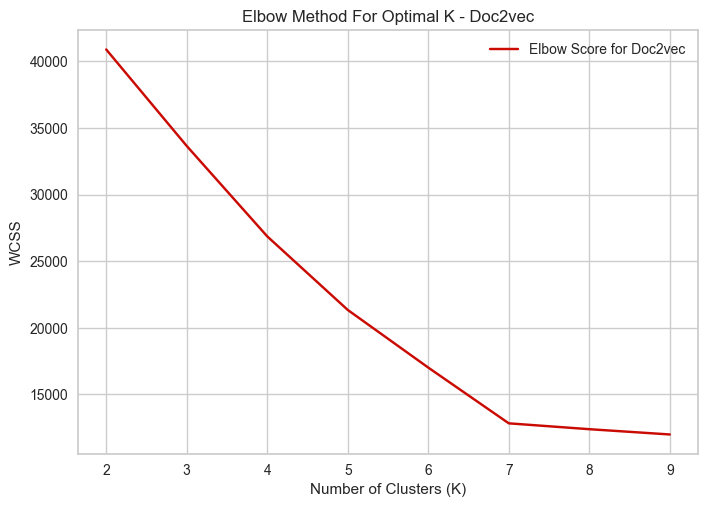

Method =  LDA
The best silhouette score was 0.6695331005178299 with k = 7
Elbow Score:  {'BOW': [28016.572186276757, 22800.86413735339, 17962.35475548705, 13875.358899963214, 10556.966879441083, 8477.221186123239, 7674.3485419323915, 7076.232847593783], 'TF_IDF 1_gram': [73.52232794538239, 58.7050418931659, 45.68051925683876, 33.23625276764592, 21.38530046727661, 13.724945097373086, 11.177601558501017, 9.969104863968397], 'Doc2vec': [40889.19921875, 33648.5859375, 26863.79296875, 21344.40625, 17018.576171875, 12835.7900390625, 12396.404296875, 12000.330078125], 'LDA': [604.841151733084, 474.3506753281602, 346.56304957159495, 215.75232342546153, 110.27203672298737, 82.83695139118478, 73.2100998295733, 65.72788630667776]}
Silhoutee Score:  {'BOW': [0.2589821450608005, 0.2703847358198904, 0.332162257947445, 0.37916010743032, 0.4217051647684601, 0.416625555317076, 0.39300447904597763, 0.37469191489695347], 'TF_IDF 1_gram': [0.2353319296953313, 0.31857495103387073, 0.39585541297434107, 0.46

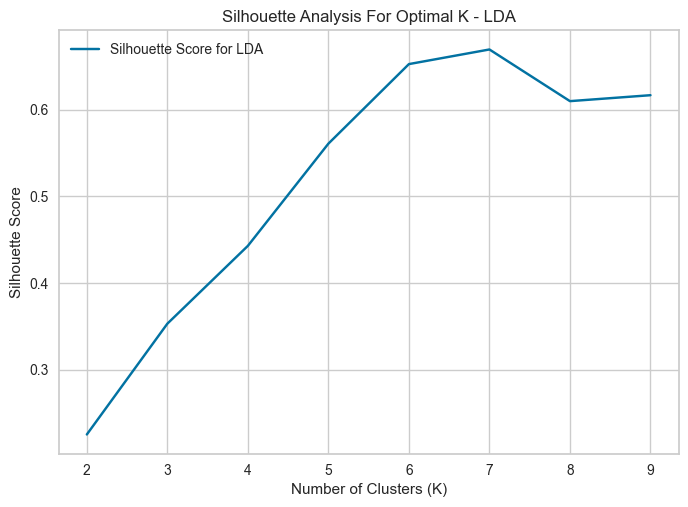

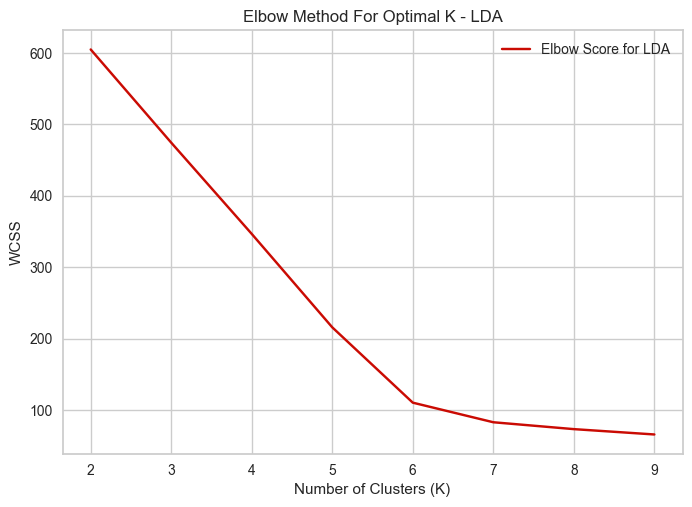

PCA =  7
Method =  BOW
The best silhouette score was 0.38807273121128816 with k = 6
Elbow Score:  {'BOW': [30658.72460688799, 25363.472561255112, 20519.23979790852, 16419.408200110283, 13047.50484535322, 10849.24802890145, 9821.148397032966, 9186.085772672533], 'TF_IDF 1_gram': [73.52232794538239, 58.7050418931659, 45.68051925683876, 33.23625276764592, 21.38530046727661, 13.724945097373086, 11.177601558501017, 9.969104863968397], 'Doc2vec': [40889.19921875, 33648.5859375, 26863.79296875, 21344.40625, 17018.576171875, 12835.7900390625, 12396.404296875, 12000.330078125], 'LDA': [604.841151733084, 474.3506753281602, 346.56304957159495, 215.75232342546153, 110.27203672298737, 82.83695139118478, 73.2100998295733, 65.72788630667776]}
Silhoutee Score:  {'BOW': [0.24736110711827933, 0.25329300645221775, 0.3082222078552163, 0.3490438954650384, 0.38807273121128816, 0.38422200848472915, 0.37079458385143904, 0.3620195401506509], 'TF_IDF 1_gram': [0.2353319296953313, 0.31857495103387073, 0.39585541

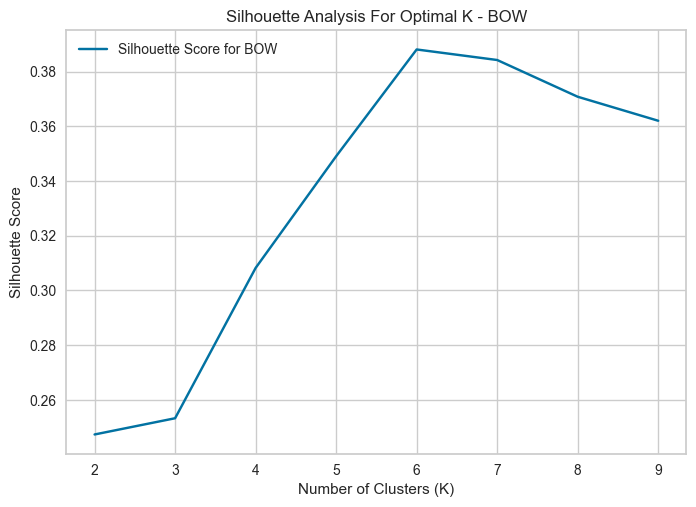

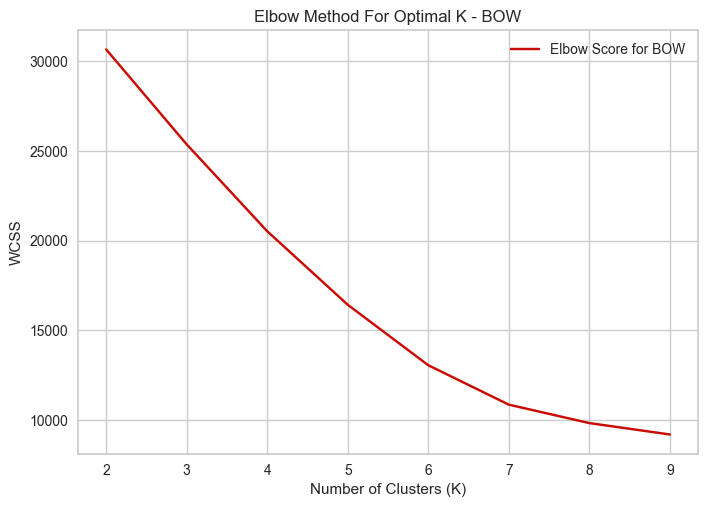

Method =  TF_IDF 1_gram
The best silhouette score was 0.5550033363553823 with k = 8
Elbow Score:  {'BOW': [30658.72460688799, 25363.472561255112, 20519.23979790852, 16419.408200110283, 13047.50484535322, 10849.24802890145, 9821.148397032966, 9186.085772672533], 'TF_IDF 1_gram': [81.08549100067057, 67.28992828002421, 53.1934315554229, 41.09450384284275, 28.820084190674578, 20.99877959800704, 16.125601250953583, 14.292052346084455], 'Doc2vec': [40889.19921875, 33648.5859375, 26863.79296875, 21344.40625, 17018.576171875, 12835.7900390625, 12396.404296875, 12000.330078125], 'LDA': [604.841151733084, 474.3506753281602, 346.56304957159495, 215.75232342546153, 110.27203672298737, 82.83695139118478, 73.2100998295733, 65.72788630667776]}
Silhoutee Score:  {'BOW': [0.24736110711827933, 0.25329300645221775, 0.3082222078552163, 0.3490438954650384, 0.38807273121128816, 0.38422200848472915, 0.37079458385143904, 0.3620195401506509], 'TF_IDF 1_gram': [0.2140059324264866, 0.28321193648437365, 0.3664769

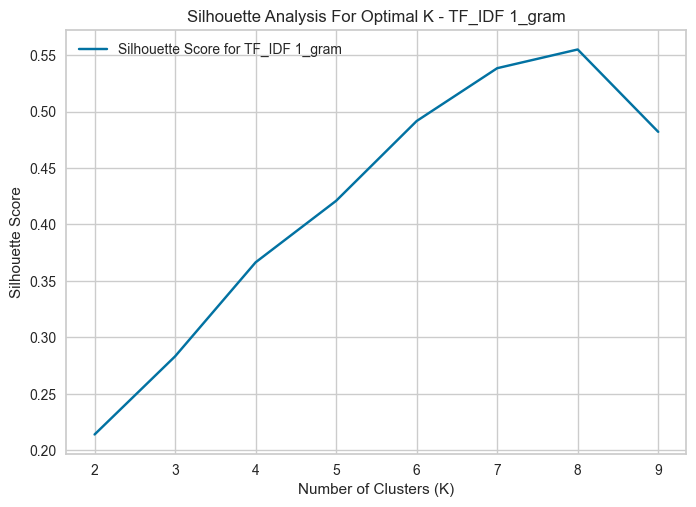

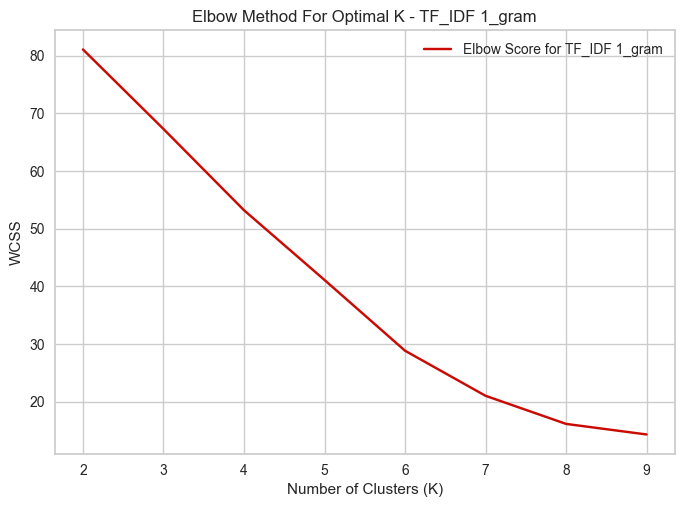

Method =  Doc2vec
The best silhouette score was 0.4114781 with k = 7
Elbow Score:  {'BOW': [30658.72460688799, 25363.472561255112, 20519.23979790852, 16419.408200110283, 13047.50484535322, 10849.24802890145, 9821.148397032966, 9186.085772672533], 'TF_IDF 1_gram': [81.08549100067057, 67.28992828002421, 53.1934315554229, 41.09450384284275, 28.820084190674578, 20.99877959800704, 16.125601250953583, 14.292052346084455], 'Doc2vec': [45000.45703125, 37666.86328125, 30945.62109375, 25401.61328125, 20994.921875, 16815.314453125, 16030.1083984375, 15352.927734375], 'LDA': [604.841151733084, 474.3506753281602, 346.56304957159495, 215.75232342546153, 110.27203672298737, 82.83695139118478, 73.2100998295733, 65.72788630667776]}
Silhoutee Score:  {'BOW': [0.24736110711827933, 0.25329300645221775, 0.3082222078552163, 0.3490438954650384, 0.38807273121128816, 0.38422200848472915, 0.37079458385143904, 0.3620195401506509], 'TF_IDF 1_gram': [0.2140059324264866, 0.28321193648437365, 0.36647699240012327, 0.

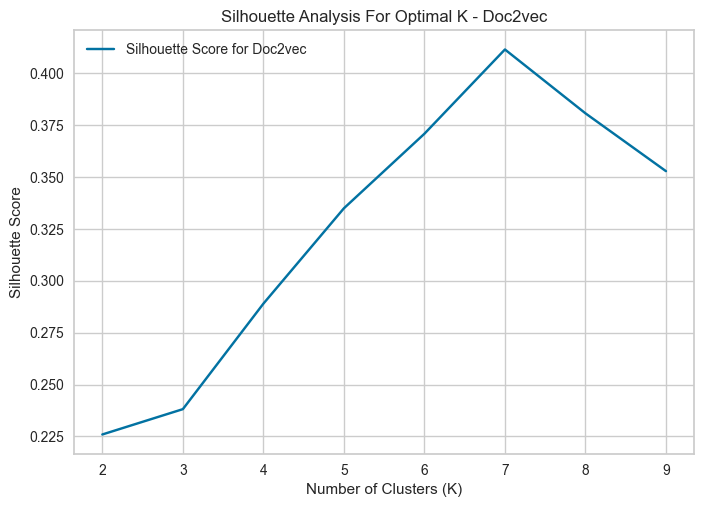

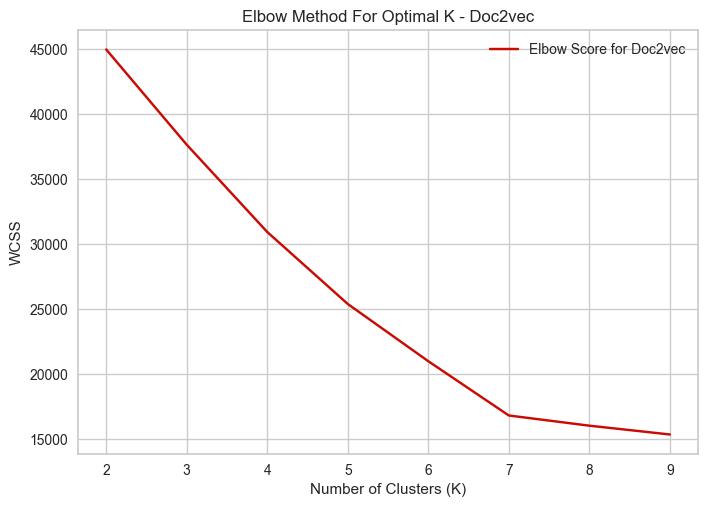

Method =  LDA
The best silhouette score was 0.6695310465884585 with k = 7
Elbow Score:  {'BOW': [30658.72460688799, 25363.472561255112, 20519.23979790852, 16419.408200110283, 13047.50484535322, 10849.24802890145, 9821.148397032966, 9186.085772672533], 'TF_IDF 1_gram': [81.08549100067057, 67.28992828002421, 53.1934315554229, 41.09450384284275, 28.820084190674578, 20.99877959800704, 16.125601250953583, 14.292052346084455], 'Doc2vec': [45000.45703125, 37666.86328125, 30945.62109375, 25401.61328125, 20994.921875, 16815.314453125, 16030.1083984375, 15352.927734375], 'LDA': [604.8411785667137, 474.3507021596892, 346.5630764351246, 215.75235023515336, 110.27206347629519, 82.83697813541673, 73.21012405620472, 65.72791023246675]}
Silhoutee Score:  {'BOW': [0.24736110711827933, 0.25329300645221775, 0.3082222078552163, 0.3490438954650384, 0.38807273121128816, 0.38422200848472915, 0.37079458385143904, 0.3620195401506509], 'TF_IDF 1_gram': [0.2140059324264866, 0.28321193648437365, 0.366476992400123

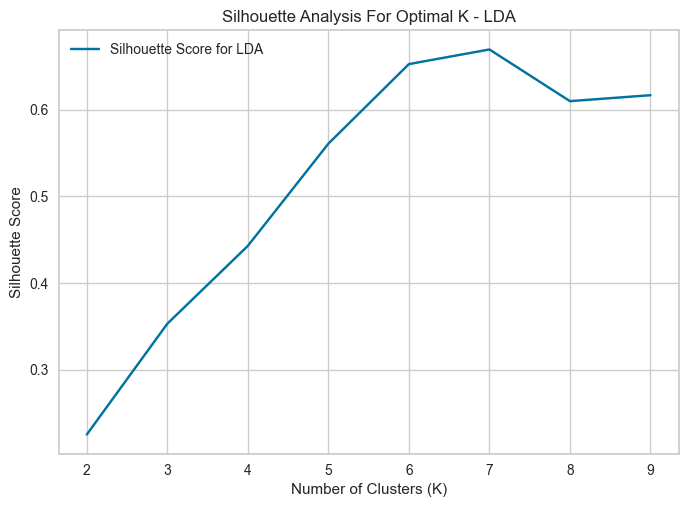

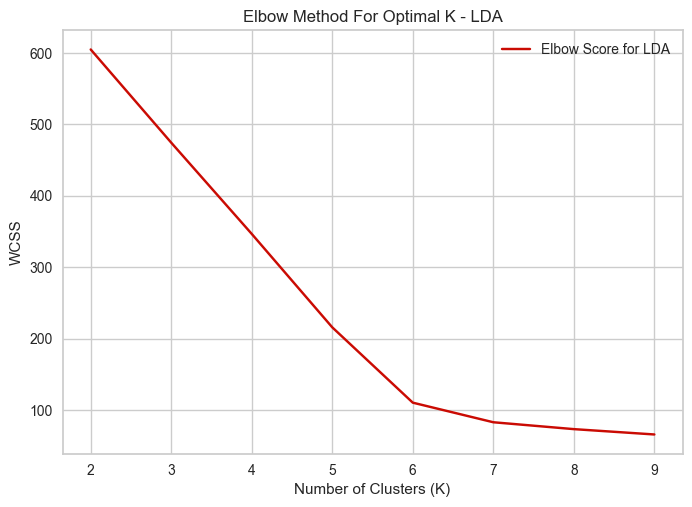

In [125]:
n_components = 8
clusters = 10

for n in range(1, n_components):
  pca = PCA(n_components=n)
  print("PCA = ", n)

  for k in text_embedding.keys():

    print("Method = ", k)
    x_data = text_embedding[k]
    x_kmeans = pca.fit_transform(x_data)
    silhouette_scores = []
    elbow_scores = []
    silhouette_score_val = np.zeros((clusters-2))
    optimal_silhouette_score = -1  # Initialize the optimal silhouette score
    optimal_k_value = -1  # Initialize the corresponding K value
   
    # Calculate silhouette score and elbow score for different number of clusters
    for i in range(2, clusters):
      kmeans_classifier = KMeans(n_clusters = i
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=500
                               , random_state = 42
                               , algorithm = 'elkan')
      label_kmeans = kmeans_classifier.fit_predict(x_kmeans)
      silhouette_score_val= silhouette_score(x_kmeans, label_kmeans)
      if silhouette_score_val > optimal_silhouette_score:
        optimal_silhouette_score = silhouette_score_val
        optimal_k_value = i
    
      silhouette_scores.append(silhouette_score_val)
      elbow_scores.append(kmeans_classifier.inertia_)

    optimal_clusters[k] = (optimal_silhouette_score, optimal_k_value)
    print( "The best silhouette score was", optimal_silhouette_score, "with k =", optimal_k_value)
   
    # Store silhouette and elbow scores in the respective dictionaries
    kmeans_elb_vec[k] = elbow_scores
    kmeans_sil_vec[k] = silhouette_scores
    print("Elbow Score: ", kmeans_elb_vec)
    print("Silhoutee Score: ", kmeans_sil_vec)
    print("optimal_clusters: ", optimal_clusters)

    # Plotting silhouette score against the number of clusters
    plt.plot(range(2, clusters), silhouette_scores, 'bx-', label='Silhouette Score for {}'.format(k))
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal K - {}'.format(k))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting elbow score against the number of clusters
    plt.plot(range(2, clusters), elbow_scores, 'rx-', label='Elbow Score for {}'.format(k))
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method For Optimal K - {}'.format(k))
    plt.legend()
    plt.grid(True)
    plt.show()
  


BOW


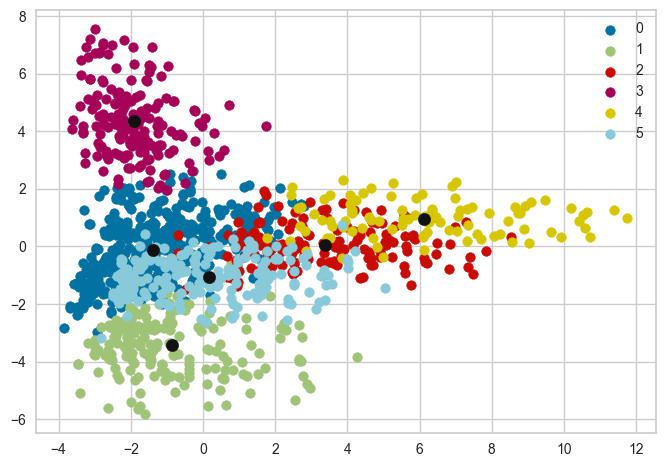

TF_IDF 1_gram


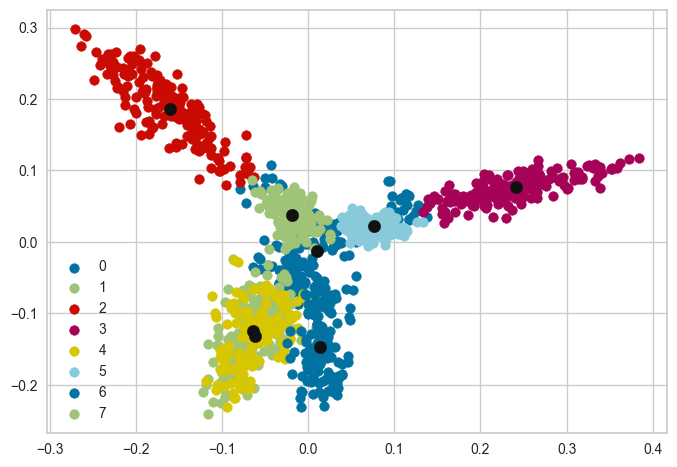

Doc2vec


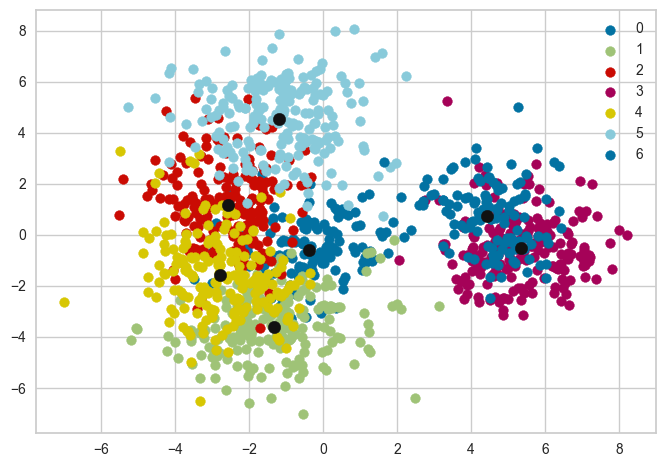

LDA


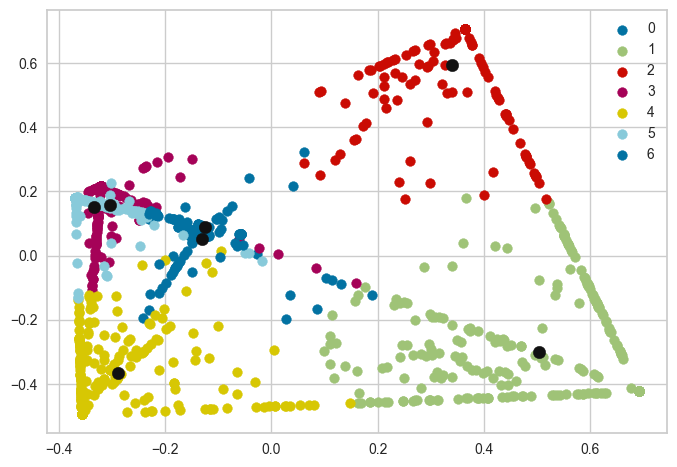

In [129]:
for k in text_embedding.keys():   

    k_value = optimal_clusters[k][1]
    x_data = text_embedding[k]
    pca = PCA(6)
    x_kmeans = pca.fit_transform(x_data)
    print(k)

    
    # Apply KMeans with optimal number of clusters
    kmeans_classifier = KMeans(n_clusters=k_value, random_state=42)
    labels = kmeans_classifier.fit_predict(x_kmeans)
    centroids = kmeans_classifier.cluster_centers_

    u_labels = np.unique(labels)
 
    #plotting the results:
 
    for i in u_labels:
        plt.scatter(x_kmeans[labels == i , 0] , x_kmeans[labels == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()
    
    # # Plotting clusters
    # plt.scatter(x_kmeans[:, 0], x_kmeans[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
    # plt.title('Clusters for {} (K={})'.format(k, k_value))
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.grid(True)
    # plt.show()

In [130]:
def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    else :
      return num

In [131]:
vecs = list(text_embedding.keys())
vec_kappa = dict()
for vec in vecs:
  kmeans_doc2vec = KMeans(n_clusters = 5
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = 42
                               , algorithm = 'elkan')
  kmeans_doc2vec.fit(text_embedding[vec])
  y_pridect = kmeans_doc2vec.predict(text_embedding[vec]) 
  y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
  y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
  # y_df['y_pred']=y_df['y_pred'].apply(lambda x : x-1000 if x > 20 else x)
  # y_df=lab(y_df)
  kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
  vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.6235648685036848,
 'TF_IDF 1_gram': 0.4844133694827807,
 'Doc2vec': 0.5673624288425048,
 'LDA': 0.5483870967741935}

In [132]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()